In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
obs = pd.read_csv('../Resources/observed_onset.csv')
warm_obs = obs[obs['OBS_PHASE'] == 'warm']
neutral_obs = obs[obs['OBS_PHASE'] == 'neutral']
cold_obs = obs[obs['OBS_PHASE'] == 'cold']
monthly_obs = pd.read_csv('../Resources/monthly_obs.csv')

warm_mean_obs = pd.read_csv('../Resources/warm_mean_obs.csv')
neutral_mean_obs = pd.read_csv('../Resources/neutral_mean_obs.csv')
cold_mean_obs = pd.read_csv('../Resources/cold_mean_obs.csv')

gfdl_warm_mean = pd.read_csv('../Resources/gfdl_warm_mean.csv')
gfdl_neutral_mean = pd.read_csv('../Resources/gfdl_neutral_mean.csv')
gfdl_cold_mean = pd.read_csv('../Resources/gfdl_cold_mean.csv')


gfdl_warm_onset_mean= pd.read_csv('../Resources/gfdl_warm_onset_mean.csv')
gfdl_all_onset_mean= pd.read_csv('../Resources/gfdl_neutral_onset_mean.csv')
gfdl_cold_onset_mean= pd.read_csv('../Resources/gfdl_cold_onset_mean.csv')
gfdl_warm_onset = pd.read_csv('../Resources/gfdl_warm_onset.csv')
gfdl_all_onset = pd.read_csv ('../Resources/gfdl_neutral_onset.csv')
gfdl_cold_onset= pd.read_csv('../Resources/gfdl_cold_onset.csv')

#import model LDC data
gfdl = pd.read_csv('../Resources/GFDL_SPEAR_FULL_LDC.csv')
gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')
nasa = pd.read_csv('../Resources/NASA_GEOSS2S_FULL_LDC.csv')
nasa_stat = pd.read_csv('../Resources/nasa_stat.csv')
canada = pd.read_csv('../Resources/CanSIPS_IC4_FULL_LDC.csv')
canada_stat = pd.read_csv('../Resources/canada_stat.csv')
canada['LDC_SST_CanSIPS_IC4'] = canada['LDC_SST_CanSIPS_IC4'] - 273.15
canada['LDC_SST_CanSIPS_IC4_ONETWO'] = canada['LDC_SST_CanSIPS_IC4_ONETWO'] - 273.15
canada['LDC_SST_CanSIPS_IC4_THREE'] = canada['LDC_SST_CanSIPS_IC4_THREE'] - 273.15
canada['LDC_SST_CanSIPS_IC4_FOUR'] = canada['LDC_SST_CanSIPS_IC4_FOUR'] - 273.15
ncep = pd.read_csv('../Resources/NCEP_CFSv2_FULL_LDC.csv')
ncep_stat = pd.read_csv('../Resources/ncep_stat.csv')
cola = pd.read_csv('../Resources/COLA_CESM1_FULL_LDC.csv')
cola_stat = pd.read_csv('../Resources/cola_stat.csv')

#import model LDC data for canadian sisters
canesm = pd.read_csv('../Resources/CanESM5_FULL_LDC.csv')
canesm_stat = pd.read_csv('../Resources/canesm_stat.csv')
canesm['LDC_SST_CanESM5'] = canesm['LDC_SST_CanESM5'] - 273.15
canesm['LDC_SST_CanESM5_ONETWO'] = canesm['LDC_SST_CanESM5_ONETWO'] - 273.15
canesm['LDC_SST_CanESM5_THREE'] = canesm['LDC_SST_CanESM5_THREE'] - 273.15
canesm['LDC_SST_CanESM5_FOUR'] = canesm['LDC_SST_CanESM5_FOUR'] - 273.15
nemo = pd.read_csv('../Resources/GEM52_NEMO_FULL_LDC.csv')
nemo['LDC_SST_GEM52_NEMO'] = nemo['LDC_SST_GEM52_NEMO'] - 273.15
nemo_stat = pd.read_csv('../Resources/nemo_stat.csv')
nemo['LDC_SST_GEM52_NEMO_ONETWO'] = nemo['LDC_SST_GEM52_NEMO_ONETWO'] - 273.15
nemo['LDC_SST_GEM52_NEMO_THREE'] = nemo['LDC_SST_GEM52_NEMO_THREE'] - 273.15
nemo['LDC_SST_GEM52_NEMO_FOUR'] = nemo['LDC_SST_GEM52_NEMO_FOUR'] - 273.15

#manage obs
obs.rename(columns={'YR': 'year', 'MON': 'month', 'DAY': 'day'}, inplace=True)
# Combine year, month, and day into a single datetime column
obs['TAR'] = pd.to_datetime(obs[['year', 'month', 'day']])
obs = obs[['TAR', 'OBS_NINO3.4_L3', 'OBS_PHASE']]
obs_dict = obs.set_index('TAR')['OBS_NINO3.4_L3'].to_dict()

#input method: 1993 JAS -> yr = 1993, mon = 8, day = 15
warm_onset_1 = {"year" : 1991, "month" : 6, "day" : 15}
warm_onset_2 = {"year" : 1994, "month" : 9, "day" : 15}
warm_onset_3 = {"year" : 1997, "month" : 5, "day" : 15}
warm_onset_4 = {"year" : 2002, "month" : 6, "day" : 15}
warm_onset_5 = {"year" : 2004, "month" : 7, "day" : 15}
warm_onset_6 = {"year" : 2006, "month" : 9, "day" : 15}
warm_onset_7 = {"year" : 2009, "month" : 7, "day" : 15}
warm_onset_8 = {"year" : 2014, "month" : 10, "day" : 15}
warm_onset_9 = {"year" : 2018, "month" : 9, "day" : 15}
#warm_onset_10 = {"year" : 2023, "month" : 5, "day" : 15}
warm_onsets = [warm_onset_1, warm_onset_2, warm_onset_3,
               warm_onset_4, warm_onset_5, warm_onset_6,
               warm_onset_7, warm_onset_8, warm_onset_9
               ]

cold_onset_1 = {"year" : 1995, "month" : 8, "day" : 15}
cold_onset_2 = {"year" : 1998, "month" : 7, "day" : 15}
cold_onset_3 = {"year" : 2005, "month" : 11, "day" : 15}
cold_onset_4 = {"year" : 2007, "month" : 6, "day" : 15}
cold_onset_5 = {"year" : 2008, "month" : 11, "day" : 15}
cold_onset_6 = {"year" : 2010, "month" : 6, "day" : 15}
cold_onset_7 = {"year" : 2011, "month" : 7, "day" : 15}
cold_onset_8 = {"year" : 2016, "month" : 8, "day" : 15}
cold_onset_9 = {"year" : 2017, "month" : 10, "day" : 15}
cold_onset_10 = {"year" : 2020, "month" : 8, "day" : 15}
cold_onsets = [cold_onset_1, cold_onset_2, cold_onset_3,
               cold_onset_4, cold_onset_5, cold_onset_6,
               cold_onset_7, cold_onset_8, cold_onset_9,
               cold_onset_10]

all_onsets = [warm_onset_1, warm_onset_2, warm_onset_3,
               warm_onset_4, warm_onset_5, warm_onset_6,
               warm_onset_7, warm_onset_8, warm_onset_9, 
              cold_onset_1, cold_onset_2, cold_onset_3,
               cold_onset_4, cold_onset_5, cold_onset_6,
               cold_onset_7, cold_onset_8, cold_onset_9,
               cold_onset_10]

gfdl_ldv = pd.read_csv('../Resources/gfdl_ldv.csv')
nasa_ldv= pd.read_csv('../Resources/nasa_ldv.csv')
cola_ldv= pd.read_csv('../Resources/cola_ldv.csv')
ncep_ldv= pd.read_csv('../Resources/ncep_ldv.csv')
canada_ldv= pd.read_csv('../Resources/canada_ldv.csv')
nemo_ldv= pd.read_csv('../Resources/nemo_ldv.csv')
canesm_ldv= pd.read_csv('../Resources/canesm_ldv.csv')


In [76]:

cold_onset_order = ['2007 MJJ', '2010 MJJ', '1998 JJA', '2011 JJA', '1995 JAS', '2016 JAS', '2020 JAS', '2017 SON', '2005 OND','2008 OND']
warm_onset_order = ['1997 AMJ', '1991 MJJ', '2002 MJJ', '2004 JJA', '2009 JJA', '1994 ASO', '2006 ASO', '2018 ASO', '2014 SON']
gfdl_ldv


,L,AMJ,MJJ,JJA,JAS,ASO,SON,OND
0,OBS,0.256750,0.281245,0.401165,0.576438,0.797956,1.057599,1.304206
1,1.5,0.129531,0.185918,0.341749,0.530060,0.674698,0.827131,0.990047
2,2.5,0.146751,0.164592,0.353194,0.519983,0.718559,0.909374,1.018578
3,3.5,0.153546,0.210448,0.321078,0.527701,0.686220,0.902582,1.134936
4,4.5,0.217253,0.226776,0.368722,0.453112,0.663950,0.889133,1.134390
5,5.5,0.272828,0.251563,0.376148,0.462081,0.546824,0.853508,1.142914
6,6.5,0.361468,0.293950,0.331142,0.475060,0.520426,0.714384,1.105441
7,7.5,0.364501,0.346343,0.362425,0.405131,0.550950,0.646750,0.943523
8,8.5,0.371956,0.373211,0.383679,0.418378,0.496197,0.695111,0.840752
9,9.5,0.414101,0.362095,0.419608,0.434631,0.481560,0.650376,0.909224


In [77]:
#process gfdl data
def gfdl_onset_finder(dict):

    gfdl_temp = gfdl.copy()

    # Query the DataFrame
    gfdl_onset = gfdl_temp[
        (gfdl_temp['TAR'].dt.year == dict["year"]) &
        (gfdl_temp['TAR'].dt.month == dict["month"]) &
        (gfdl_temp['TAR'].dt.day == dict["day"])
    ]
    return gfdl_onset
    
gfdl['MON'] = pd.to_datetime(gfdl['MON'], format = '%H%M %d %b %Y')
gfdl['START'] = gfdl['MON'].dt.month
gfdl['TARGET'] = ((gfdl['START'] + gfdl['L']).astype(int))%12
gfdl['TARGET'] = gfdl['TARGET'].apply(lambda x: 12 if x == 0 else x)
gfdl['TAR'] = gfdl.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
gfdl['TAR'] = gfdl.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
gfdl['SZN'] = gfdl['TARGET'].map(month_to_season)
gfdl = gfdl[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_GFDL_SPEAR']]
gfdl = gfdl.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the gfdl DataFrame
gfdl.loc[:, 'OBS_NINO3.4_L3'] = gfdl['TAR'].map(obs_dict)

gfdl_warm_onset_dfs = {}
gfdl_cold_onset_dfs = {}
gfdl_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    gfdl_warm_onset_dfs[f'{j}'] = gfdl_onset_finder(i)
    j += 1

gfdl_warm_onset = pd.concat([gfdl_warm_onset_dfs[key] for key in gfdl_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    gfdl_cold_onset_dfs[f'{j}'] = gfdl_onset_finder(i)
    j += 1
gfdl_cold_onset = pd.concat([gfdl_cold_onset_dfs[key] for key in gfdl_cold_onset_dfs.keys()], ignore_index=True)
gfdl_all_onset = pd.concat([gfdl_cold_onset,gfdl_warm_onset], ignore_index=True)

gfdl_dict = {(row['L'], col): row[col] for _, row in gfdl_ldv.iterrows() for col in gfdl_ldv.columns if col != 'L'}
def map_ldv(row):
    key = (str(row['L']), row['SZN'])
    return gfdl_dict.get(key, None)

# Create the 'LDV' column in gfdl_all_onset
gfdl_all_onset['LDV'] = gfdl_all_onset.apply(map_ldv, axis=1)
gfdl_cold_onset['LDV'] = gfdl_cold_onset.apply(map_ldv, axis=1)
gfdl_warm_onset['LDV'] = gfdl_warm_onset.apply(map_ldv, axis=1)

#1
multi_index_stat = gfdl_stat.set_index(['L', 'SZN'])['MEAN_SST_GFDL_SPEAR']
gfdl_all_onset['MEAN_SST_GFDL_SPEAR'] = gfdl_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
gfdl_all_onset.reset_index(drop=True, inplace=True)
gfdl_all_onset['ANOM_GFDL_SPEAR'] = gfdl_all_onset['LDC_SST_GFDL_SPEAR'] - gfdl_all_onset['MEAN_SST_GFDL_SPEAR']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
gfdl_all_onset['MEAN_OBS_NINO3.4_L3'] = gfdl_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
gfdl_all_onset.reset_index(drop=True, inplace=True)
gfdl_all_onset['ANOM_OBS'] = gfdl_all_onset['OBS_NINO3.4_L3'] - gfdl_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
gfdl_all_onset['VARIANCE3.4_L3'] = gfdl_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
gfdl_all_onset.reset_index(drop=True, inplace=True)
#different formula for SESS! LDV
#gfdl_all_onset['SESS'] = 1-((gfdl_all_onset['ANOM_GFDL_SPEAR']-gfdl_all_onset['ANOM_OBS'])*(gfdl_all_onset['ANOM_GFDL_SPEAR']-gfdl_all_onset['ANOM_OBS'])/(gfdl_all_onset['VARIANCE3.4_L3']))
gfdl_all_onset['SESS'] = 1-((gfdl_all_onset['ANOM_GFDL_SPEAR']-gfdl_all_onset['ANOM_OBS'])*(gfdl_all_onset['ANOM_GFDL_SPEAR']-gfdl_all_onset['ANOM_OBS'])/(gfdl_all_onset['LDV']))

#4
gfdl_all_onset['Year'] = gfdl_all_onset['TAR'].dt.year
gfdl_all_onset['ONSET'] = gfdl_all_onset['Year'].astype(str) + ' ' + gfdl_all_onset['SZN']
gfdl_all_onset = gfdl_all_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = gfdl_stat.set_index(['L', 'SZN'])['MEAN_SST_GFDL_SPEAR']
gfdl_warm_onset['MEAN_SST_GFDL_SPEAR'] = gfdl_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
gfdl_warm_onset.reset_index(drop=True, inplace=True)
gfdl_warm_onset['ANOM_GFDL_SPEAR'] = gfdl_warm_onset['LDC_SST_GFDL_SPEAR'] - gfdl_warm_onset['MEAN_SST_GFDL_SPEAR']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
gfdl_warm_onset['MEAN_OBS_NINO3.4_L3'] = gfdl_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
gfdl_warm_onset.reset_index(drop=True, inplace=True)
gfdl_warm_onset['ANOM_OBS'] = gfdl_warm_onset['OBS_NINO3.4_L3'] - gfdl_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
gfdl_warm_onset['VARIANCE3.4_L3'] = gfdl_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
gfdl_warm_onset.reset_index(drop=True, inplace=True)
#gfdl_warm_onset['SESS'] = 1-((gfdl_warm_onset['ANOM_GFDL_SPEAR']-gfdl_warm_onset['ANOM_OBS'])*(gfdl_warm_onset['ANOM_GFDL_SPEAR']-gfdl_warm_onset['ANOM_OBS'])/(gfdl_warm_onset['VARIANCE3.4_L3']))
gfdl_warm_onset['SESS'] = 1-((gfdl_warm_onset['ANOM_GFDL_SPEAR']-gfdl_warm_onset['ANOM_OBS'])*(gfdl_warm_onset['ANOM_GFDL_SPEAR']-gfdl_warm_onset['ANOM_OBS'])/(gfdl_warm_onset['LDV']))

#4
gfdl_warm_onset['Year'] = gfdl_warm_onset['TAR'].dt.year
gfdl_warm_onset['ONSET'] = gfdl_warm_onset['Year'].astype(str) + ' ' + gfdl_warm_onset['SZN']
gfdl_warm_onset = gfdl_warm_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = gfdl_stat.set_index(['L', 'SZN'])['MEAN_SST_GFDL_SPEAR']
gfdl_cold_onset['MEAN_SST_GFDL_SPEAR'] = gfdl_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
gfdl_cold_onset.reset_index(drop=True, inplace=True)
gfdl_cold_onset['ANOM_GFDL_SPEAR'] = gfdl_cold_onset['LDC_SST_GFDL_SPEAR'] - gfdl_cold_onset['MEAN_SST_GFDL_SPEAR']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
gfdl_cold_onset['MEAN_OBS_NINO3.4_L3'] = gfdl_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
gfdl_cold_onset.reset_index(drop=True, inplace=True)
gfdl_cold_onset['ANOM_OBS'] = gfdl_cold_onset['OBS_NINO3.4_L3'] - gfdl_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
gfdl_cold_onset['VARIANCE3.4_L3'] = gfdl_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
gfdl_cold_onset.reset_index(drop=True, inplace=True)
#gfdl_cold_onset['SESS'] = 1-((gfdl_cold_onset['ANOM_GFDL_SPEAR']-gfdl_cold_onset['ANOM_OBS'])*(gfdl_cold_onset['ANOM_GFDL_SPEAR']-gfdl_cold_onset['ANOM_OBS'])/(gfdl_cold_onset['VARIANCE3.4_L3']))
gfdl_cold_onset['SESS'] = 1-((gfdl_cold_onset['ANOM_GFDL_SPEAR']-gfdl_cold_onset['ANOM_OBS'])*(gfdl_cold_onset['ANOM_GFDL_SPEAR']-gfdl_cold_onset['ANOM_OBS'])/(gfdl_cold_onset['LDV']))

#4
gfdl_cold_onset['Year'] = gfdl_cold_onset['TAR'].dt.year
gfdl_cold_onset['ONSET'] = gfdl_cold_onset['Year'].astype(str) + ' ' + gfdl_cold_onset['SZN']
gfdl_cold_onset = gfdl_cold_onset[['L', 'MON','TAR','ONSET', 'SESS']]

gfdl_warm_mesh = gfdl_warm_onset.pivot(index='L', columns='ONSET', values='SESS')
gfdl_warm_mesh = gfdl_warm_mesh.fillna(np.nan)
gfdl_cold_mesh = gfdl_cold_onset.pivot(index='L', columns='ONSET', values='SESS')
gfdl_cold_mesh = gfdl_cold_mesh.fillna(np.nan)
gfdl_all_mesh = gfdl_all_onset.pivot(index='L', columns='ONSET', values='SESS')
gfdl_all_mesh = gfdl_all_mesh.fillna(np.nan)
gfdl_cold_mesh = gfdl_cold_mesh.reindex(columns=cold_onset_order)
gfdl_warm_mesh = gfdl_warm_mesh.reindex(columns=warm_onset_order)



In [78]:
#process cola data
def cola_onset_finder(dict):

    cola_temp = cola.copy()

    # Query the DataFrame
    cola_onset = cola_temp[
        (cola_temp['TAR'].dt.year == dict["year"]) &
        (cola_temp['TAR'].dt.month == dict["month"]) &
        (cola_temp['TAR'].dt.day == dict["day"])
    ]
    return cola_onset
    
cola['MON'] = pd.to_datetime(cola['MON'], format = '%H%M %d %b %Y')
cola['START'] = cola['MON'].dt.month
cola['TARGET'] = ((cola['START'] + cola['L']).astype(int))%12
cola['TARGET'] = cola['TARGET'].apply(lambda x: 12 if x == 0 else x)
cola['TAR'] = cola.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
cola['TAR'] = cola.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
cola['SZN'] = cola['TARGET'].map(month_to_season)
cola = cola[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_COLA_CESM1']]
cola = cola.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the cola DataFrame
cola.loc[:, 'OBS_NINO3.4_L3'] = cola['TAR'].map(obs_dict)

cola_warm_onset_dfs = {}
cola_cold_onset_dfs = {}
cola_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    cola_warm_onset_dfs[f'{j}'] = cola_onset_finder(i)
    j += 1

cola_warm_onset = pd.concat([cola_warm_onset_dfs[key] for key in cola_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    cola_cold_onset_dfs[f'{j}'] = cola_onset_finder(i)
    j += 1
cola_cold_onset = pd.concat([cola_cold_onset_dfs[key] for key in cola_cold_onset_dfs.keys()], ignore_index=True)
cola_all_onset = pd.concat([cola_cold_onset,cola_warm_onset], ignore_index=True)

cola_dict = {(row['L'], col): row[col] for _, row in cola_ldv.iterrows() for col in cola_ldv.columns if col != 'L'}
def map_ldv(row):
    key = (str(row['L']), row['SZN'])
    return cola_dict.get(key, None)

# Create the 'LDV' column in cola_all_onset
cola_all_onset['LDV'] = cola_all_onset.apply(map_ldv, axis=1)
cola_cold_onset['LDV'] = cola_cold_onset.apply(map_ldv, axis=1)
cola_warm_onset['LDV'] = cola_warm_onset.apply(map_ldv, axis=1)

#1
multi_index_stat = cola_stat.set_index(['L', 'SZN'])['MEAN_SST_COLA_CESM1']
cola_all_onset['MEAN_SST_COLA_CESM1'] = cola_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
cola_all_onset.reset_index(drop=True, inplace=True)
cola_all_onset['ANOM_COLA_CESM1'] = cola_all_onset['LDC_SST_COLA_CESM1'] - cola_all_onset['MEAN_SST_COLA_CESM1']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
cola_all_onset['MEAN_OBS_NINO3.4_L3'] = cola_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
cola_all_onset.reset_index(drop=True, inplace=True)
cola_all_onset['ANOM_OBS'] = cola_all_onset['OBS_NINO3.4_L3'] - cola_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
cola_all_onset['VARIANCE3.4_L3'] = cola_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
cola_all_onset.reset_index(drop=True, inplace=True)
#different formula for SESS! LDV
#cola_all_onset['SESS'] = 1-((cola_all_onset['ANOM_COLA_CESM1']-cola_all_onset['ANOM_OBS'])*(cola_all_onset['ANOM_COLA_CESM1']-cola_all_onset['ANOM_OBS'])/(cola_all_onset['VARIANCE3.4_L3']))
cola_all_onset['SESS'] = 1-((cola_all_onset['ANOM_COLA_CESM1']-cola_all_onset['ANOM_OBS'])*(cola_all_onset['ANOM_COLA_CESM1']-cola_all_onset['ANOM_OBS'])/(cola_all_onset['LDV']))

#4
cola_all_onset['Year'] = cola_all_onset['TAR'].dt.year
cola_all_onset['ONSET'] = cola_all_onset['Year'].astype(str) + ' ' + cola_all_onset['SZN']
cola_all_onset = cola_all_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = cola_stat.set_index(['L', 'SZN'])['MEAN_SST_COLA_CESM1']
cola_warm_onset['MEAN_SST_COLA_CESM1'] = cola_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
cola_warm_onset.reset_index(drop=True, inplace=True)
cola_warm_onset['ANOM_COLA_CESM1'] = cola_warm_onset['LDC_SST_COLA_CESM1'] - cola_warm_onset['MEAN_SST_COLA_CESM1']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
cola_warm_onset['MEAN_OBS_NINO3.4_L3'] = cola_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
cola_warm_onset.reset_index(drop=True, inplace=True)
cola_warm_onset['ANOM_OBS'] = cola_warm_onset['OBS_NINO3.4_L3'] - cola_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
cola_warm_onset['VARIANCE3.4_L3'] = cola_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
cola_warm_onset.reset_index(drop=True, inplace=True)
#cola_warm_onset['SESS'] = 1-((cola_warm_onset['ANOM_COLA_CESM1']-cola_warm_onset['ANOM_OBS'])*(cola_warm_onset['ANOM_COLA_CESM1']-cola_warm_onset['ANOM_OBS'])/(cola_warm_onset['VARIANCE3.4_L3']))
cola_warm_onset['SESS'] = 1-((cola_warm_onset['ANOM_COLA_CESM1']-cola_warm_onset['ANOM_OBS'])*(cola_warm_onset['ANOM_COLA_CESM1']-cola_warm_onset['ANOM_OBS'])/(cola_warm_onset['LDV']))

#4
cola_warm_onset['Year'] = cola_warm_onset['TAR'].dt.year
cola_warm_onset['ONSET'] = cola_warm_onset['Year'].astype(str) + ' ' + cola_warm_onset['SZN']
cola_warm_onset = cola_warm_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = cola_stat.set_index(['L', 'SZN'])['MEAN_SST_COLA_CESM1']
cola_cold_onset['MEAN_SST_COLA_CESM1'] = cola_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
cola_cold_onset.reset_index(drop=True, inplace=True)
cola_cold_onset['ANOM_COLA_CESM1'] = cola_cold_onset['LDC_SST_COLA_CESM1'] - cola_cold_onset['MEAN_SST_COLA_CESM1']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
cola_cold_onset['MEAN_OBS_NINO3.4_L3'] = cola_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
cola_cold_onset.reset_index(drop=True, inplace=True)
cola_cold_onset['ANOM_OBS'] = cola_cold_onset['OBS_NINO3.4_L3'] - cola_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
cola_cold_onset['VARIANCE3.4_L3'] = cola_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
cola_cold_onset.reset_index(drop=True, inplace=True)
#cola_cold_onset['SESS'] = 1-((cola_cold_onset['ANOM_COLA_CESM1']-cola_cold_onset['ANOM_OBS'])*(cola_cold_onset['ANOM_COLA_CESM1']-cola_cold_onset['ANOM_OBS'])/(cola_cold_onset['VARIANCE3.4_L3']))
cola_cold_onset['SESS'] = 1-((cola_cold_onset['ANOM_COLA_CESM1']-cola_cold_onset['ANOM_OBS'])*(cola_cold_onset['ANOM_COLA_CESM1']-cola_cold_onset['ANOM_OBS'])/(cola_cold_onset['LDV']))

#4
cola_cold_onset['Year'] = cola_cold_onset['TAR'].dt.year
cola_cold_onset['ONSET'] = cola_cold_onset['Year'].astype(str) + ' ' + cola_cold_onset['SZN']
cola_cold_onset = cola_cold_onset[['L', 'MON','TAR','ONSET', 'SESS']]

cola_warm_mesh = cola_warm_onset.pivot(index='L', columns='ONSET', values='SESS')
cola_warm_mesh = cola_warm_mesh.fillna(np.nan)
cola_cold_mesh = cola_cold_onset.pivot(index='L', columns='ONSET', values='SESS')
cola_cold_mesh = cola_cold_mesh.fillna(np.nan)
cola_all_mesh = cola_all_onset.pivot(index='L', columns='ONSET', values='SESS')
cola_all_mesh = cola_all_mesh.fillna(np.nan)
cola_cold_mesh = cola_cold_mesh.reindex(columns=cold_onset_order)
cola_warm_mesh = cola_warm_mesh.reindex(columns=warm_onset_order)



In [79]:
#process canada data
def canada_onset_finder(dict):

    canada_temp = canada.copy()

    # Query the DataFrame
    canada_onset = canada_temp[
        (canada_temp['TAR'].dt.year == dict["year"]) &
        (canada_temp['TAR'].dt.month == dict["month"]) &
        (canada_temp['TAR'].dt.day == dict["day"])
    ]
    return canada_onset
    
canada['MON'] = pd.to_datetime(canada['MON'], format = '%H%M %d %b %Y')
canada['START'] = canada['MON'].dt.month
canada['TARGET'] = ((canada['START'] + canada['L']).astype(int))%12
canada['TARGET'] = canada['TARGET'].apply(lambda x: 12 if x == 0 else x)
canada['TAR'] = canada.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
canada['TAR'] = canada.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canada['SZN'] = canada['TARGET'].map(month_to_season)
canada = canada[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_CanSIPS_IC4']]
canada = canada.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the canada DataFrame
canada.loc[:, 'OBS_NINO3.4_L3'] = canada['TAR'].map(obs_dict)

canada_warm_onset_dfs = {}
canada_cold_onset_dfs = {}
canada_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    canada_warm_onset_dfs[f'{j}'] = canada_onset_finder(i)
    j += 1

canada_warm_onset = pd.concat([canada_warm_onset_dfs[key] for key in canada_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    canada_cold_onset_dfs[f'{j}'] = canada_onset_finder(i)
    j += 1
canada_cold_onset = pd.concat([canada_cold_onset_dfs[key] for key in canada_cold_onset_dfs.keys()], ignore_index=True)
canada_all_onset = pd.concat([canada_cold_onset,canada_warm_onset], ignore_index=True)

canada_dict = {(row['L'], col): row[col] for _, row in canada_ldv.iterrows() for col in canada_ldv.columns if col != 'L'}
def map_ldv(row):
    key = (str(row['L']), row['SZN'])
    return canada_dict.get(key, None)

# Create the 'LDV' column in canada_all_onset
canada_all_onset['LDV'] = canada_all_onset.apply(map_ldv, axis=1)
canada_cold_onset['LDV'] = canada_cold_onset.apply(map_ldv, axis=1)
canada_warm_onset['LDV'] = canada_warm_onset.apply(map_ldv, axis=1)

#1
multi_index_stat = canada_stat.set_index(['L', 'SZN'])['MEAN_SST_CanSIPS_IC4']
canada_all_onset['MEAN_SST_CanSIPS_IC4'] = canada_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canada_all_onset.reset_index(drop=True, inplace=True)
canada_all_onset['ANOM_CanSIPS_IC4'] = canada_all_onset['LDC_SST_CanSIPS_IC4'] - canada_all_onset['MEAN_SST_CanSIPS_IC4']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canada_all_onset['MEAN_OBS_NINO3.4_L3'] = canada_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canada_all_onset.reset_index(drop=True, inplace=True)
canada_all_onset['ANOM_OBS'] = canada_all_onset['OBS_NINO3.4_L3'] - canada_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canada_all_onset['VARIANCE3.4_L3'] = canada_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canada_all_onset.reset_index(drop=True, inplace=True)
#different formula for SESS! LDV
#canada_all_onset['SESS'] = 1-((canada_all_onset['ANOM_CanSIPS_IC4']-canada_all_onset['ANOM_OBS'])*(canada_all_onset['ANOM_CanSIPS_IC4']-canada_all_onset['ANOM_OBS'])/(canada_all_onset['VARIANCE3.4_L3']))
canada_all_onset['SESS'] = 1-((canada_all_onset['ANOM_CanSIPS_IC4']-canada_all_onset['ANOM_OBS'])*(canada_all_onset['ANOM_CanSIPS_IC4']-canada_all_onset['ANOM_OBS'])/(canada_all_onset['LDV']))

#4
canada_all_onset['Year'] = canada_all_onset['TAR'].dt.year
canada_all_onset['ONSET'] = canada_all_onset['Year'].astype(str) + ' ' + canada_all_onset['SZN']
canada_all_onset = canada_all_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = canada_stat.set_index(['L', 'SZN'])['MEAN_SST_CanSIPS_IC4']
canada_warm_onset['MEAN_SST_CanSIPS_IC4'] = canada_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canada_warm_onset.reset_index(drop=True, inplace=True)
canada_warm_onset['ANOM_CanSIPS_IC4'] = canada_warm_onset['LDC_SST_CanSIPS_IC4'] - canada_warm_onset['MEAN_SST_CanSIPS_IC4']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canada_warm_onset['MEAN_OBS_NINO3.4_L3'] = canada_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canada_warm_onset.reset_index(drop=True, inplace=True)
canada_warm_onset['ANOM_OBS'] = canada_warm_onset['OBS_NINO3.4_L3'] - canada_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canada_warm_onset['VARIANCE3.4_L3'] = canada_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canada_warm_onset.reset_index(drop=True, inplace=True)
#canada_warm_onset['SESS'] = 1-((canada_warm_onset['ANOM_CanSIPS_IC4']-canada_warm_onset['ANOM_OBS'])*(canada_warm_onset['ANOM_CanSIPS_IC4']-canada_warm_onset['ANOM_OBS'])/(canada_warm_onset['VARIANCE3.4_L3']))
canada_warm_onset['SESS'] = 1-((canada_warm_onset['ANOM_CanSIPS_IC4']-canada_warm_onset['ANOM_OBS'])*(canada_warm_onset['ANOM_CanSIPS_IC4']-canada_warm_onset['ANOM_OBS'])/(canada_warm_onset['LDV']))

#4
canada_warm_onset['Year'] = canada_warm_onset['TAR'].dt.year
canada_warm_onset['ONSET'] = canada_warm_onset['Year'].astype(str) + ' ' + canada_warm_onset['SZN']
canada_warm_onset = canada_warm_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = canada_stat.set_index(['L', 'SZN'])['MEAN_SST_CanSIPS_IC4']
canada_cold_onset['MEAN_SST_CanSIPS_IC4'] = canada_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canada_cold_onset.reset_index(drop=True, inplace=True)
canada_cold_onset['ANOM_CanSIPS_IC4'] = canada_cold_onset['LDC_SST_CanSIPS_IC4'] - canada_cold_onset['MEAN_SST_CanSIPS_IC4']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canada_cold_onset['MEAN_OBS_NINO3.4_L3'] = canada_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canada_cold_onset.reset_index(drop=True, inplace=True)
canada_cold_onset['ANOM_OBS'] = canada_cold_onset['OBS_NINO3.4_L3'] - canada_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canada_cold_onset['VARIANCE3.4_L3'] = canada_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canada_cold_onset.reset_index(drop=True, inplace=True)
#canada_cold_onset['SESS'] = 1-((canada_cold_onset['ANOM_CanSIPS_IC4']-canada_cold_onset['ANOM_OBS'])*(canada_cold_onset['ANOM_CanSIPS_IC4']-canada_cold_onset['ANOM_OBS'])/(canada_cold_onset['VARIANCE3.4_L3']))
canada_cold_onset['SESS'] = 1-((canada_cold_onset['ANOM_CanSIPS_IC4']-canada_cold_onset['ANOM_OBS'])*(canada_cold_onset['ANOM_CanSIPS_IC4']-canada_cold_onset['ANOM_OBS'])/(canada_cold_onset['LDV']))

#4
canada_cold_onset['Year'] = canada_cold_onset['TAR'].dt.year
canada_cold_onset['ONSET'] = canada_cold_onset['Year'].astype(str) + ' ' + canada_cold_onset['SZN']
canada_cold_onset = canada_cold_onset[['L', 'MON','TAR','ONSET', 'SESS']]

canada_warm_mesh = canada_warm_onset.pivot(index='L', columns='ONSET', values='SESS')
canada_warm_mesh = canada_warm_mesh.fillna(np.nan)
canada_cold_mesh = canada_cold_onset.pivot(index='L', columns='ONSET', values='SESS')
canada_cold_mesh = canada_cold_mesh.fillna(np.nan)
canada_all_mesh = canada_all_onset.pivot(index='L', columns='ONSET', values='SESS')
canada_all_mesh = canada_all_mesh.fillna(np.nan)
canada_cold_mesh = canada_cold_mesh.reindex(columns=cold_onset_order)
canada_warm_mesh = canada_warm_mesh.reindex(columns=warm_onset_order)



In [80]:
#process canesm data
def canesm_onset_finder(dict):

    canesm_temp = canesm.copy()

    # Query the DataFrame
    canesm_onset = canesm_temp[
        (canesm_temp['TAR'].dt.year == dict["year"]) &
        (canesm_temp['TAR'].dt.month == dict["month"]) &
        (canesm_temp['TAR'].dt.day == dict["day"])
    ]
    return canesm_onset
    
canesm['MON'] = pd.to_datetime(canesm['MON'], format = '%H%M %d %b %Y')
canesm['START'] = canesm['MON'].dt.month
canesm['TARGET'] = ((canesm['START'] + canesm['L']).astype(int))%12
canesm['TARGET'] = canesm['TARGET'].apply(lambda x: 12 if x == 0 else x)
canesm['TAR'] = canesm.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
canesm['TAR'] = canesm.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canesm['SZN'] = canesm['TARGET'].map(month_to_season)
canesm = canesm[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_CanESM5']]
canesm = canesm.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the canesm DataFrame
canesm.loc[:, 'OBS_NINO3.4_L3'] = canesm['TAR'].map(obs_dict)

canesm_warm_onset_dfs = {}
canesm_cold_onset_dfs = {}
canesm_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    canesm_warm_onset_dfs[f'{j}'] = canesm_onset_finder(i)
    j += 1

canesm_warm_onset = pd.concat([canesm_warm_onset_dfs[key] for key in canesm_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    canesm_cold_onset_dfs[f'{j}'] = canesm_onset_finder(i)
    j += 1
canesm_cold_onset = pd.concat([canesm_cold_onset_dfs[key] for key in canesm_cold_onset_dfs.keys()], ignore_index=True)
canesm_all_onset = pd.concat([canesm_cold_onset,canesm_warm_onset], ignore_index=True)

canesm_dict = {(row['L'], col): row[col] for _, row in canesm_ldv.iterrows() for col in canesm_ldv.columns if col != 'L'}
def map_ldv(row):
    key = (str(row['L']), row['SZN'])
    return canesm_dict.get(key, None)

# Create the 'LDV' column in canesm_all_onset
canesm_all_onset['LDV'] = canesm_all_onset.apply(map_ldv, axis=1)
canesm_cold_onset['LDV'] = canesm_cold_onset.apply(map_ldv, axis=1)
canesm_warm_onset['LDV'] = canesm_warm_onset.apply(map_ldv, axis=1)

#1
multi_index_stat = canesm_stat.set_index(['L', 'SZN'])['MEAN_SST_CanESM5']
canesm_all_onset['MEAN_SST_CanESM5'] = canesm_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canesm_all_onset.reset_index(drop=True, inplace=True)
canesm_all_onset['ANOM_CanESM5'] = canesm_all_onset['LDC_SST_CanESM5'] - canesm_all_onset['MEAN_SST_CanESM5']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canesm_all_onset['MEAN_OBS_NINO3.4_L3'] = canesm_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canesm_all_onset.reset_index(drop=True, inplace=True)
canesm_all_onset['ANOM_OBS'] = canesm_all_onset['OBS_NINO3.4_L3'] - canesm_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canesm_all_onset['VARIANCE3.4_L3'] = canesm_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canesm_all_onset.reset_index(drop=True, inplace=True)
#different formula for SESS! LDV
#canesm_all_onset['SESS'] = 1-((canesm_all_onset['ANOM_CanESM5']-canesm_all_onset['ANOM_OBS'])*(canesm_all_onset['ANOM_CanESM5']-canesm_all_onset['ANOM_OBS'])/(canesm_all_onset['VARIANCE3.4_L3']))
canesm_all_onset['SESS'] = 1-((canesm_all_onset['ANOM_CanESM5']-canesm_all_onset['ANOM_OBS'])*(canesm_all_onset['ANOM_CanESM5']-canesm_all_onset['ANOM_OBS'])/(canesm_all_onset['LDV']))

#4
canesm_all_onset['Year'] = canesm_all_onset['TAR'].dt.year
canesm_all_onset['ONSET'] = canesm_all_onset['Year'].astype(str) + ' ' + canesm_all_onset['SZN']
canesm_all_onset = canesm_all_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = canesm_stat.set_index(['L', 'SZN'])['MEAN_SST_CanESM5']
canesm_warm_onset['MEAN_SST_CanESM5'] = canesm_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canesm_warm_onset.reset_index(drop=True, inplace=True)
canesm_warm_onset['ANOM_CanESM5'] = canesm_warm_onset['LDC_SST_CanESM5'] - canesm_warm_onset['MEAN_SST_CanESM5']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canesm_warm_onset['MEAN_OBS_NINO3.4_L3'] = canesm_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canesm_warm_onset.reset_index(drop=True, inplace=True)
canesm_warm_onset['ANOM_OBS'] = canesm_warm_onset['OBS_NINO3.4_L3'] - canesm_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canesm_warm_onset['VARIANCE3.4_L3'] = canesm_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canesm_warm_onset.reset_index(drop=True, inplace=True)
#canesm_warm_onset['SESS'] = 1-((canesm_warm_onset['ANOM_CanESM5']-canesm_warm_onset['ANOM_OBS'])*(canesm_warm_onset['ANOM_CanESM5']-canesm_warm_onset['ANOM_OBS'])/(canesm_warm_onset['VARIANCE3.4_L3']))
canesm_warm_onset['SESS'] = 1-((canesm_warm_onset['ANOM_CanESM5']-canesm_warm_onset['ANOM_OBS'])*(canesm_warm_onset['ANOM_CanESM5']-canesm_warm_onset['ANOM_OBS'])/(canesm_warm_onset['LDV']))

#4
canesm_warm_onset['Year'] = canesm_warm_onset['TAR'].dt.year
canesm_warm_onset['ONSET'] = canesm_warm_onset['Year'].astype(str) + ' ' + canesm_warm_onset['SZN']
canesm_warm_onset = canesm_warm_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = canesm_stat.set_index(['L', 'SZN'])['MEAN_SST_CanESM5']
canesm_cold_onset['MEAN_SST_CanESM5'] = canesm_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canesm_cold_onset.reset_index(drop=True, inplace=True)
canesm_cold_onset['ANOM_CanESM5'] = canesm_cold_onset['LDC_SST_CanESM5'] - canesm_cold_onset['MEAN_SST_CanESM5']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canesm_cold_onset['MEAN_OBS_NINO3.4_L3'] = canesm_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canesm_cold_onset.reset_index(drop=True, inplace=True)
canesm_cold_onset['ANOM_OBS'] = canesm_cold_onset['OBS_NINO3.4_L3'] - canesm_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canesm_cold_onset['VARIANCE3.4_L3'] = canesm_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canesm_cold_onset.reset_index(drop=True, inplace=True)
#canesm_cold_onset['SESS'] = 1-((canesm_cold_onset['ANOM_CanESM5']-canesm_cold_onset['ANOM_OBS'])*(canesm_cold_onset['ANOM_CanESM5']-canesm_cold_onset['ANOM_OBS'])/(canesm_cold_onset['VARIANCE3.4_L3']))
canesm_cold_onset['SESS'] = 1-((canesm_cold_onset['ANOM_CanESM5']-canesm_cold_onset['ANOM_OBS'])*(canesm_cold_onset['ANOM_CanESM5']-canesm_cold_onset['ANOM_OBS'])/(canesm_cold_onset['LDV']))

#4
canesm_cold_onset['Year'] = canesm_cold_onset['TAR'].dt.year
canesm_cold_onset['ONSET'] = canesm_cold_onset['Year'].astype(str) + ' ' + canesm_cold_onset['SZN']
canesm_cold_onset = canesm_cold_onset[['L', 'MON','TAR','ONSET', 'SESS']]

canesm_warm_mesh = canesm_warm_onset.pivot(index='L', columns='ONSET', values='SESS')
canesm_warm_mesh = canesm_warm_mesh.fillna(np.nan)
canesm_cold_mesh = canesm_cold_onset.pivot(index='L', columns='ONSET', values='SESS')
canesm_cold_mesh = canesm_cold_mesh.fillna(np.nan)
canesm_all_mesh = canesm_all_onset.pivot(index='L', columns='ONSET', values='SESS')
canesm_all_mesh = canesm_all_mesh.fillna(np.nan)
canesm_cold_mesh = canesm_cold_mesh.reindex(columns=cold_onset_order)
canesm_warm_mesh = canesm_warm_mesh.reindex(columns=warm_onset_order)



In [81]:
#process nemo data
def nemo_onset_finder(dict):

    nemo_temp = nemo.copy()

    # Query the DataFrame
    nemo_onset = nemo_temp[
        (nemo_temp['TAR'].dt.year == dict["year"]) &
        (nemo_temp['TAR'].dt.month == dict["month"]) &
        (nemo_temp['TAR'].dt.day == dict["day"])
    ]
    return nemo_onset
    
nemo['MON'] = pd.to_datetime(nemo['MON'], format = '%H%M %d %b %Y')
nemo['START'] = nemo['MON'].dt.month
nemo['TARGET'] = ((nemo['START'] + nemo['L']).astype(int))%12
nemo['TARGET'] = nemo['TARGET'].apply(lambda x: 12 if x == 0 else x)
nemo['TAR'] = nemo.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
nemo['TAR'] = nemo.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nemo['SZN'] = nemo['TARGET'].map(month_to_season)
nemo = nemo[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_GEM52_NEMO']]
nemo = nemo.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the nemo DataFrame
nemo.loc[:, 'OBS_NINO3.4_L3'] = nemo['TAR'].map(obs_dict)

nemo_warm_onset_dfs = {}
nemo_cold_onset_dfs = {}
nemo_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    nemo_warm_onset_dfs[f'{j}'] = nemo_onset_finder(i)
    j += 1

nemo_warm_onset = pd.concat([nemo_warm_onset_dfs[key] for key in nemo_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    nemo_cold_onset_dfs[f'{j}'] = nemo_onset_finder(i)
    j += 1
nemo_cold_onset = pd.concat([nemo_cold_onset_dfs[key] for key in nemo_cold_onset_dfs.keys()], ignore_index=True)
nemo_all_onset = pd.concat([nemo_cold_onset,nemo_warm_onset], ignore_index=True)

nemo_dict = {(row['L'], col): row[col] for _, row in nemo_ldv.iterrows() for col in nemo_ldv.columns if col != 'L'}
def map_ldv(row):
    key = (str(row['L']), row['SZN'])
    return nemo_dict.get(key, None)

# Create the 'LDV' column in nemo_all_onset
nemo_all_onset['LDV'] = nemo_all_onset.apply(map_ldv, axis=1)
nemo_cold_onset['LDV'] = nemo_cold_onset.apply(map_ldv, axis=1)
nemo_warm_onset['LDV'] = nemo_warm_onset.apply(map_ldv, axis=1)

#1
multi_index_stat = nemo_stat.set_index(['L', 'SZN'])['MEAN_SST_GEM52_NEMO']
nemo_all_onset['MEAN_SST_GEM52_NEMO'] = nemo_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nemo_all_onset.reset_index(drop=True, inplace=True)
nemo_all_onset['ANOM_GEM52_NEMO'] = nemo_all_onset['LDC_SST_GEM52_NEMO'] - nemo_all_onset['MEAN_SST_GEM52_NEMO']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nemo_all_onset['MEAN_OBS_NINO3.4_L3'] = nemo_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nemo_all_onset.reset_index(drop=True, inplace=True)
nemo_all_onset['ANOM_OBS'] = nemo_all_onset['OBS_NINO3.4_L3'] - nemo_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nemo_all_onset['VARIANCE3.4_L3'] = nemo_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nemo_all_onset.reset_index(drop=True, inplace=True)
#different formula for SESS! LDV
#nemo_all_onset['SESS'] = 1-((nemo_all_onset['ANOM_GEM52_NEMO']-nemo_all_onset['ANOM_OBS'])*(nemo_all_onset['ANOM_GEM52_NEMO']-nemo_all_onset['ANOM_OBS'])/(nemo_all_onset['VARIANCE3.4_L3']))
nemo_all_onset['SESS'] = 1-((nemo_all_onset['ANOM_GEM52_NEMO']-nemo_all_onset['ANOM_OBS'])*(nemo_all_onset['ANOM_GEM52_NEMO']-nemo_all_onset['ANOM_OBS'])/(nemo_all_onset['LDV']))

#4
nemo_all_onset['Year'] = nemo_all_onset['TAR'].dt.year
nemo_all_onset['ONSET'] = nemo_all_onset['Year'].astype(str) + ' ' + nemo_all_onset['SZN']
nemo_all_onset = nemo_all_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = nemo_stat.set_index(['L', 'SZN'])['MEAN_SST_GEM52_NEMO']
nemo_warm_onset['MEAN_SST_GEM52_NEMO'] = nemo_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nemo_warm_onset.reset_index(drop=True, inplace=True)
nemo_warm_onset['ANOM_GEM52_NEMO'] = nemo_warm_onset['LDC_SST_GEM52_NEMO'] - nemo_warm_onset['MEAN_SST_GEM52_NEMO']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nemo_warm_onset['MEAN_OBS_NINO3.4_L3'] = nemo_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nemo_warm_onset.reset_index(drop=True, inplace=True)
nemo_warm_onset['ANOM_OBS'] = nemo_warm_onset['OBS_NINO3.4_L3'] - nemo_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nemo_warm_onset['VARIANCE3.4_L3'] = nemo_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nemo_warm_onset.reset_index(drop=True, inplace=True)
#nemo_warm_onset['SESS'] = 1-((nemo_warm_onset['ANOM_GEM52_NEMO']-nemo_warm_onset['ANOM_OBS'])*(nemo_warm_onset['ANOM_GEM52_NEMO']-nemo_warm_onset['ANOM_OBS'])/(nemo_warm_onset['VARIANCE3.4_L3']))
nemo_warm_onset['SESS'] = 1-((nemo_warm_onset['ANOM_GEM52_NEMO']-nemo_warm_onset['ANOM_OBS'])*(nemo_warm_onset['ANOM_GEM52_NEMO']-nemo_warm_onset['ANOM_OBS'])/(nemo_warm_onset['LDV']))

#4
nemo_warm_onset['Year'] = nemo_warm_onset['TAR'].dt.year
nemo_warm_onset['ONSET'] = nemo_warm_onset['Year'].astype(str) + ' ' + nemo_warm_onset['SZN']
nemo_warm_onset = nemo_warm_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = nemo_stat.set_index(['L', 'SZN'])['MEAN_SST_GEM52_NEMO']
nemo_cold_onset['MEAN_SST_GEM52_NEMO'] = nemo_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nemo_cold_onset.reset_index(drop=True, inplace=True)
nemo_cold_onset['ANOM_GEM52_NEMO'] = nemo_cold_onset['LDC_SST_GEM52_NEMO'] - nemo_cold_onset['MEAN_SST_GEM52_NEMO']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nemo_cold_onset['MEAN_OBS_NINO3.4_L3'] = nemo_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nemo_cold_onset.reset_index(drop=True, inplace=True)
nemo_cold_onset['ANOM_OBS'] = nemo_cold_onset['OBS_NINO3.4_L3'] - nemo_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nemo_cold_onset['VARIANCE3.4_L3'] = nemo_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nemo_cold_onset.reset_index(drop=True, inplace=True)
#nemo_cold_onset['SESS'] = 1-((nemo_cold_onset['ANOM_GEM52_NEMO']-nemo_cold_onset['ANOM_OBS'])*(nemo_cold_onset['ANOM_GEM52_NEMO']-nemo_cold_onset['ANOM_OBS'])/(nemo_cold_onset['VARIANCE3.4_L3']))
nemo_cold_onset['SESS'] = 1-((nemo_cold_onset['ANOM_GEM52_NEMO']-nemo_cold_onset['ANOM_OBS'])*(nemo_cold_onset['ANOM_GEM52_NEMO']-nemo_cold_onset['ANOM_OBS'])/(nemo_cold_onset['LDV']))

#4
nemo_cold_onset['Year'] = nemo_cold_onset['TAR'].dt.year
nemo_cold_onset['ONSET'] = nemo_cold_onset['Year'].astype(str) + ' ' + nemo_cold_onset['SZN']
nemo_cold_onset = nemo_cold_onset[['L', 'MON','TAR','ONSET', 'SESS']]

nemo_warm_mesh = nemo_warm_onset.pivot(index='L', columns='ONSET', values='SESS')
nemo_warm_mesh = nemo_warm_mesh.fillna(np.nan)
nemo_cold_mesh = nemo_cold_onset.pivot(index='L', columns='ONSET', values='SESS')
nemo_cold_mesh = nemo_cold_mesh.fillna(np.nan)
nemo_all_mesh = nemo_all_onset.pivot(index='L', columns='ONSET', values='SESS')
nemo_all_mesh = nemo_all_mesh.fillna(np.nan)
nemo_cold_mesh = nemo_cold_mesh.reindex(columns=cold_onset_order)
nemo_warm_mesh = nemo_warm_mesh.reindex(columns=warm_onset_order)

nemo_all_mesh


ONSET,1991 MJJ,1994 ASO,1995 JAS,1997 AMJ,1998 JJA,2002 MJJ,2004 JJA,2005 OND,2006 ASO,2007 MJJ,2008 OND,2009 JJA,2010 MJJ,2011 JJA,2014 SON,2016 JAS,2017 SON,2018 ASO,2020 JAS
L,,,,,,,,,,,,,,,,,,,
1.5,0.740793,0.838093,0.999926,0.999739,-0.010151,0.834345,0.688955,0.990135,0.999377,0.636657,0.985521,0.769533,0.998904,0.852699,0.999687,0.996265,0.982874,0.955172,0.984333
2.5,0.995365,0.634230,0.992296,0.905345,0.891756,0.908439,0.422251,0.981562,0.948456,0.993971,0.958426,0.940179,0.859183,0.779532,0.954449,0.956855,0.808108,0.938436,0.997526
3.5,0.878236,0.422052,0.919851,0.996929,0.854724,0.838326,0.526955,0.932152,0.750195,0.932435,0.985815,0.948486,0.587796,0.586023,0.970007,0.984882,0.724182,0.967842,0.961344
4.5,0.992298,-0.310838,0.974084,0.897713,0.915357,0.941416,0.068211,0.991403,0.788675,0.973318,0.998339,0.850299,0.579488,0.590234,0.816764,0.925636,0.070942,0.944904,0.820478
5.5,0.832672,-0.885473,0.978693,0.783894,0.979925,0.575577,0.469532,0.912864,0.554171,0.982815,0.996992,0.717186,-1.649929,0.711271,0.589676,0.954969,-1.205411,0.894662,0.667699
6.5,NaN,-1.275242,0.967144,0.870855,0.767708,0.795137,0.117655,0.999940,0.669883,0.580558,0.906644,0.622605,-2.773670,0.927059,0.458085,0.844117,-1.398650,0.998336,0.803183
7.5,NaN,-1.607955,0.998476,0.948102,0.779684,0.999960,0.214509,0.999300,0.224269,0.786858,0.930948,0.545651,-1.696928,0.999841,0.096607,0.172223,-3.352746,0.865993,0.507063
8.5,NaN,-2.821925,0.999976,0.374850,0.964936,0.743422,0.268300,0.927758,0.517383,0.837699,0.999781,0.213610,-1.611151,0.999469,0.344720,-0.223010,-5.219262,0.957572,0.525840
9.5,NaN,-3.973653,0.998583,0.396849,0.859774,0.574578,0.607091,0.854027,0.194370,0.638686,0.941548,0.625269,-2.710053,0.913857,0.834125,0.846996,-4.301423,0.774542,0.362377


In [82]:
#process nasa data
def nasa_onset_finder(dict):

    nasa_temp = nasa.copy()

    # Query the DataFrame
    nasa_onset = nasa_temp[
        (nasa_temp['TAR'].dt.year == dict["year"]) &
        (nasa_temp['TAR'].dt.month == dict["month"]) &
        (nasa_temp['TAR'].dt.day == dict["day"])
    ]
    return nasa_onset
    
nasa['MON'] = pd.to_datetime(nasa['MON'], format = '%H%M %d %b %Y')
nasa['START'] = nasa['MON'].dt.month
nasa['TARGET'] = ((nasa['START'] + nasa['L']).astype(int))%12
nasa['TARGET'] = nasa['TARGET'].apply(lambda x: 12 if x == 0 else x)
nasa['TAR'] = nasa.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
nasa['TAR'] = nasa.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nasa['SZN'] = nasa['TARGET'].map(month_to_season)
nasa = nasa[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_NASA_GEOSS2S']]
nasa = nasa.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the nasa DataFrame
nasa.loc[:, 'OBS_NINO3.4_L3'] = nasa['TAR'].map(obs_dict)

nasa_warm_onset_dfs = {}
nasa_cold_onset_dfs = {}
nasa_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    nasa_warm_onset_dfs[f'{j}'] = nasa_onset_finder(i)
    j += 1

nasa_warm_onset = pd.concat([nasa_warm_onset_dfs[key] for key in nasa_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    nasa_cold_onset_dfs[f'{j}'] = nasa_onset_finder(i)
    j += 1
nasa_cold_onset = pd.concat([nasa_cold_onset_dfs[key] for key in nasa_cold_onset_dfs.keys()], ignore_index=True)
nasa_all_onset = pd.concat([nasa_cold_onset,nasa_warm_onset], ignore_index=True)


nasa_dict = {(row['L'], col): row[col] for _, row in nasa_ldv.iterrows() for col in nasa_ldv.columns if col != 'L'}
def map_ldv(row):
    key = (str(row['L']), row['SZN'])
    return nasa_dict.get(key, None)

# Create the 'LDV' column in nasa_all_onset
nasa_all_onset['LDV'] = nasa_all_onset.apply(map_ldv, axis=1)
nasa_cold_onset['LDV'] = nasa_cold_onset.apply(map_ldv, axis=1)
nasa_warm_onset['LDV'] = nasa_warm_onset.apply(map_ldv, axis=1)

#1
multi_index_stat = nasa_stat.set_index(['L', 'SZN'])['MEAN_SST_NASA_GEOSS2S']
nasa_all_onset['MEAN_SST_NASA_GEOSS2S'] = nasa_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nasa_all_onset.reset_index(drop=True, inplace=True)
nasa_all_onset['ANOM_NASA_GEOSS2S'] = nasa_all_onset['LDC_SST_NASA_GEOSS2S'] - nasa_all_onset['MEAN_SST_NASA_GEOSS2S']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nasa_all_onset['MEAN_OBS_NINO3.4_L3'] = nasa_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nasa_all_onset.reset_index(drop=True, inplace=True)
nasa_all_onset['ANOM_OBS'] = nasa_all_onset['OBS_NINO3.4_L3'] - nasa_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nasa_all_onset['VARIANCE3.4_L3'] = nasa_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nasa_all_onset.reset_index(drop=True, inplace=True)
#different formula for SESS! LDV
#nasa_all_onset['SESS'] = 1-((nasa_all_onset['ANOM_NASA_GEOSS2S']-nasa_all_onset['ANOM_OBS'])*(nasa_all_onset['ANOM_NASA_GEOSS2S']-nasa_all_onset['ANOM_OBS'])/(nasa_all_onset['VARIANCE3.4_L3']))
nasa_all_onset['SESS'] = 1-((nasa_all_onset['ANOM_NASA_GEOSS2S']-nasa_all_onset['ANOM_OBS'])*(nasa_all_onset['ANOM_NASA_GEOSS2S']-nasa_all_onset['ANOM_OBS'])/(nasa_all_onset['LDV']))

#4
nasa_all_onset['Year'] = nasa_all_onset['TAR'].dt.year
nasa_all_onset['ONSET'] = nasa_all_onset['Year'].astype(str) + ' ' + nasa_all_onset['SZN']
nasa_all_onset = nasa_all_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = nasa_stat.set_index(['L', 'SZN'])['MEAN_SST_NASA_GEOSS2S']
nasa_warm_onset['MEAN_SST_NASA_GEOSS2S'] = nasa_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nasa_warm_onset.reset_index(drop=True, inplace=True)
nasa_warm_onset['ANOM_NASA_GEOSS2S'] = nasa_warm_onset['LDC_SST_NASA_GEOSS2S'] - nasa_warm_onset['MEAN_SST_NASA_GEOSS2S']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nasa_warm_onset['MEAN_OBS_NINO3.4_L3'] = nasa_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nasa_warm_onset.reset_index(drop=True, inplace=True)
nasa_warm_onset['ANOM_OBS'] = nasa_warm_onset['OBS_NINO3.4_L3'] - nasa_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nasa_warm_onset['VARIANCE3.4_L3'] = nasa_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nasa_warm_onset.reset_index(drop=True, inplace=True)
#nasa_warm_onset['SESS'] = 1-((nasa_warm_onset['ANOM_NASA_GEOSS2S']-nasa_warm_onset['ANOM_OBS'])*(nasa_warm_onset['ANOM_NASA_GEOSS2S']-nasa_warm_onset['ANOM_OBS'])/(nasa_warm_onset['VARIANCE3.4_L3']))
nasa_warm_onset['SESS'] = 1-((nasa_warm_onset['ANOM_NASA_GEOSS2S']-nasa_warm_onset['ANOM_OBS'])*(nasa_warm_onset['ANOM_NASA_GEOSS2S']-nasa_warm_onset['ANOM_OBS'])/(nasa_warm_onset['LDV']))

#4
nasa_warm_onset['Year'] = nasa_warm_onset['TAR'].dt.year
nasa_warm_onset['ONSET'] = nasa_warm_onset['Year'].astype(str) + ' ' + nasa_warm_onset['SZN']
nasa_warm_onset = nasa_warm_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = nasa_stat.set_index(['L', 'SZN'])['MEAN_SST_NASA_GEOSS2S']
nasa_cold_onset['MEAN_SST_NASA_GEOSS2S'] = nasa_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nasa_cold_onset.reset_index(drop=True, inplace=True)
nasa_cold_onset['ANOM_NASA_GEOSS2S'] = nasa_cold_onset['LDC_SST_NASA_GEOSS2S'] - nasa_cold_onset['MEAN_SST_NASA_GEOSS2S']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nasa_cold_onset['MEAN_OBS_NINO3.4_L3'] = nasa_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nasa_cold_onset.reset_index(drop=True, inplace=True)
nasa_cold_onset['ANOM_OBS'] = nasa_cold_onset['OBS_NINO3.4_L3'] - nasa_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nasa_cold_onset['VARIANCE3.4_L3'] = nasa_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nasa_cold_onset.reset_index(drop=True, inplace=True)
#nasa_cold_onset['SESS'] = 1-((nasa_cold_onset['ANOM_NASA_GEOSS2S']-nasa_cold_onset['ANOM_OBS'])*(nasa_cold_onset['ANOM_NASA_GEOSS2S']-nasa_cold_onset['ANOM_OBS'])/(nasa_cold_onset['VARIANCE3.4_L3']))
nasa_cold_onset['SESS'] = 1-((nasa_cold_onset['ANOM_NASA_GEOSS2S']-nasa_cold_onset['ANOM_OBS'])*(nasa_cold_onset['ANOM_NASA_GEOSS2S']-nasa_cold_onset['ANOM_OBS'])/(nasa_cold_onset['LDV']))

#4
nasa_cold_onset['Year'] = nasa_cold_onset['TAR'].dt.year
nasa_cold_onset['ONSET'] = nasa_cold_onset['Year'].astype(str) + ' ' + nasa_cold_onset['SZN']
nasa_cold_onset = nasa_cold_onset[['L', 'MON','TAR','ONSET', 'SESS']]

nasa_warm_mesh = nasa_warm_onset.pivot(index='L', columns='ONSET', values='SESS')
new_rows = pd.DataFrame(np.nan, index=[8.5,9.5, 10.5], columns=nasa_warm_mesh.columns)
nasa_warm_mesh = pd.concat([nasa_warm_mesh, new_rows])
nasa_warm_mesh.index.name = 'L'
nasa_warm_mesh = nasa_warm_mesh.fillna(np.nan)

nasa_cold_mesh = nasa_cold_onset.pivot(index='L', columns='ONSET', values='SESS')
new_rows = pd.DataFrame(np.nan, index=[8.5,9.5, 10.5], columns=nasa_cold_mesh.columns)
nasa_cold_mesh = pd.concat([nasa_cold_mesh, new_rows])
nasa_cold_mesh.index.name = 'L'
nasa_cold_mesh = nasa_cold_mesh.fillna(np.nan)

nasa_all_mesh = nasa_all_onset.pivot(index='L', columns='ONSET', values='SESS')
new_rows = pd.DataFrame(np.nan, index=[8.5, 9.5, 10.5], columns=nasa_all_mesh.columns)
nasa_all_mesh = pd.concat([nasa_all_mesh, new_rows])
nasa_all_mesh.index.name = 'L'
nasa_all_mesh = nasa_all_mesh.fillna(np.nan)


nasa_cold_mesh = nasa_cold_mesh.reindex(columns=cold_onset_order)
nasa_warm_mesh = nasa_warm_mesh.reindex(columns=warm_onset_order)

nasa_warm_mesh


ONSET,1997 AMJ,1991 MJJ,2002 MJJ,2004 JJA,2009 JJA,1994 ASO,2006 ASO,2018 ASO,2014 SON
L,,,,,,,,,
1.5,0.982605,0.703716,0.692635,0.996437,0.984448,0.690114,0.993709,0.995220,0.849569
2.5,0.937519,0.158083,0.948886,0.978379,0.967096,0.825612,0.853973,0.937135,0.982684
3.5,0.595992,0.377195,0.991289,0.971758,0.542035,0.978586,0.988972,0.996357,0.995167
4.5,0.997598,0.981269,0.634102,0.999164,0.645067,0.966400,0.777342,0.111684,0.913753
5.5,0.874164,-0.247079,0.842249,0.950559,0.786310,0.947850,0.903836,0.466738,0.993147
6.5,0.731907,NaN,0.763153,0.880005,0.990567,0.126773,0.797829,0.503736,0.322203
7.5,0.855260,NaN,0.984904,0.158459,0.847904,0.761609,0.924926,0.766913,0.088359
8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#process ncep data
def ncep_onset_finder(dict):

    ncep_temp = ncep.copy()

    # Query the DataFrame
    ncep_onset = ncep_temp[
        (ncep_temp['TAR'].dt.year == dict["year"]) &
        (ncep_temp['TAR'].dt.month == dict["month"]) &
        (ncep_temp['TAR'].dt.day == dict["day"])
    ]
    return ncep_onset
    
ncep['MON'] = pd.to_datetime(ncep['MON'], format = '%H%M %d %b %Y')
ncep['START'] = ncep['MON'].dt.month
ncep['TARGET'] = ((ncep['START'] + ncep['L']).astype(int))%12
ncep['TARGET'] = ncep['TARGET'].apply(lambda x: 12 if x == 0 else x)
ncep['TAR'] = ncep.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
ncep['TAR'] = ncep.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
ncep['SZN'] = ncep['TARGET'].map(month_to_season)
ncep = ncep[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_NCEP_CFSv2']]
ncep = ncep.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the ncep DataFrame
ncep.loc[:, 'OBS_NINO3.4_L3'] = ncep['TAR'].map(obs_dict)

ncep_warm_onset_dfs = {}
ncep_cold_onset_dfs = {}
ncep_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    ncep_warm_onset_dfs[f'{j}'] = ncep_onset_finder(i)
    j += 1

ncep_warm_onset = pd.concat([ncep_warm_onset_dfs[key] for key in ncep_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    ncep_cold_onset_dfs[f'{j}'] = ncep_onset_finder(i)
    j += 1
ncep_cold_onset = pd.concat([ncep_cold_onset_dfs[key] for key in ncep_cold_onset_dfs.keys()], ignore_index=True)
ncep_all_onset = pd.concat([ncep_cold_onset,ncep_warm_onset], ignore_index=True)


ncep_dict = {(row['L'], col): row[col] for _, row in ncep_ldv.iterrows() for col in ncep_ldv.columns if col != 'L'}
def map_ldv(row):
    key = (str(row['L']), row['SZN'])
    return ncep_dict.get(key, None)

# Create the 'LDV' column in ncep_all_onset
ncep_all_onset['LDV'] = ncep_all_onset.apply(map_ldv, axis=1)
ncep_cold_onset['LDV'] = ncep_cold_onset.apply(map_ldv, axis=1)
ncep_warm_onset['LDV'] = ncep_warm_onset.apply(map_ldv, axis=1)

#1
multi_index_stat = ncep_stat.set_index(['L', 'SZN'])['MEAN_SST_NCEP_CFSv2']
ncep_all_onset['MEAN_SST_NCEP_CFSv2'] = ncep_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
ncep_all_onset.reset_index(drop=True, inplace=True)
ncep_all_onset['ANOM_NCEP_CFSv2'] = ncep_all_onset['LDC_SST_NCEP_CFSv2'] - ncep_all_onset['MEAN_SST_NCEP_CFSv2']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
ncep_all_onset['MEAN_OBS_NINO3.4_L3'] = ncep_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
ncep_all_onset.reset_index(drop=True, inplace=True)
ncep_all_onset['ANOM_OBS'] = ncep_all_onset['OBS_NINO3.4_L3'] - ncep_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
ncep_all_onset['VARIANCE3.4_L3'] = ncep_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
ncep_all_onset.reset_index(drop=True, inplace=True)
#different formula for SESS! LDV
#ncep_all_onset['SESS'] = 1-((ncep_all_onset['ANOM_NCEP_CFSv2']-ncep_all_onset['ANOM_OBS'])*(ncep_all_onset['ANOM_NCEP_CFSv2']-ncep_all_onset['ANOM_OBS'])/(ncep_all_onset['VARIANCE3.4_L3']))
ncep_all_onset['SESS'] = 1-((ncep_all_onset['ANOM_NCEP_CFSv2']-ncep_all_onset['ANOM_OBS'])*(ncep_all_onset['ANOM_NCEP_CFSv2']-ncep_all_onset['ANOM_OBS'])/(ncep_all_onset['LDV']))

#4
ncep_all_onset['Year'] = ncep_all_onset['TAR'].dt.year
ncep_all_onset['ONSET'] = ncep_all_onset['Year'].astype(str) + ' ' + ncep_all_onset['SZN']
ncep_all_onset = ncep_all_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = ncep_stat.set_index(['L', 'SZN'])['MEAN_SST_NCEP_CFSv2']
ncep_warm_onset['MEAN_SST_NCEP_CFSv2'] = ncep_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
ncep_warm_onset.reset_index(drop=True, inplace=True)
ncep_warm_onset['ANOM_NCEP_CFSv2'] = ncep_warm_onset['LDC_SST_NCEP_CFSv2'] - ncep_warm_onset['MEAN_SST_NCEP_CFSv2']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
ncep_warm_onset['MEAN_OBS_NINO3.4_L3'] = ncep_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
ncep_warm_onset.reset_index(drop=True, inplace=True)
ncep_warm_onset['ANOM_OBS'] = ncep_warm_onset['OBS_NINO3.4_L3'] - ncep_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
ncep_warm_onset['VARIANCE3.4_L3'] = ncep_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
ncep_warm_onset.reset_index(drop=True, inplace=True)
#ncep_warm_onset['SESS'] = 1-((ncep_warm_onset['ANOM_NCEP_CFSv2']-ncep_warm_onset['ANOM_OBS'])*(ncep_warm_onset['ANOM_NCEP_CFSv2']-ncep_warm_onset['ANOM_OBS'])/(ncep_warm_onset['VARIANCE3.4_L3']))
ncep_warm_onset['SESS'] = 1-((ncep_warm_onset['ANOM_NCEP_CFSv2']-ncep_warm_onset['ANOM_OBS'])*(ncep_warm_onset['ANOM_NCEP_CFSv2']-ncep_warm_onset['ANOM_OBS'])/(ncep_warm_onset['LDV']))

#4
ncep_warm_onset['Year'] = ncep_warm_onset['TAR'].dt.year
ncep_warm_onset['ONSET'] = ncep_warm_onset['Year'].astype(str) + ' ' + ncep_warm_onset['SZN']
ncep_warm_onset = ncep_warm_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = ncep_stat.set_index(['L', 'SZN'])['MEAN_SST_NCEP_CFSv2']
ncep_cold_onset['MEAN_SST_NCEP_CFSv2'] = ncep_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
ncep_cold_onset.reset_index(drop=True, inplace=True)
ncep_cold_onset['ANOM_NCEP_CFSv2'] = ncep_cold_onset['LDC_SST_NCEP_CFSv2'] - ncep_cold_onset['MEAN_SST_NCEP_CFSv2']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
ncep_cold_onset['MEAN_OBS_NINO3.4_L3'] = ncep_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
ncep_cold_onset.reset_index(drop=True, inplace=True)
ncep_cold_onset['ANOM_OBS'] = ncep_cold_onset['OBS_NINO3.4_L3'] - ncep_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
ncep_cold_onset['VARIANCE3.4_L3'] = ncep_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
ncep_cold_onset.reset_index(drop=True, inplace=True)
#ncep_cold_onset['SESS'] = 1-((ncep_cold_onset['ANOM_NCEP_CFSv2']-ncep_cold_onset['ANOM_OBS'])*(ncep_cold_onset['ANOM_NCEP_CFSv2']-ncep_cold_onset['ANOM_OBS'])/(ncep_cold_onset['VARIANCE3.4_L3']))
ncep_cold_onset['SESS'] = 1-((ncep_cold_onset['ANOM_NCEP_CFSv2']-ncep_cold_onset['ANOM_OBS'])*(ncep_cold_onset['ANOM_NCEP_CFSv2']-ncep_cold_onset['ANOM_OBS'])/(ncep_cold_onset['LDV']))

#4
ncep_cold_onset['Year'] = ncep_cold_onset['TAR'].dt.year
ncep_cold_onset['ONSET'] = ncep_cold_onset['Year'].astype(str) + ' ' + ncep_cold_onset['SZN']
ncep_cold_onset = ncep_cold_onset[['L', 'MON','TAR','ONSET', 'SESS']]

ncep_warm_mesh = ncep_warm_onset.pivot(index='L', columns='ONSET', values='SESS')
new_rows = pd.DataFrame(np.nan, index=[9.5, 10.5], columns=ncep_warm_mesh.columns)
ncep_warm_mesh = pd.concat([ncep_warm_mesh, new_rows])
ncep_warm_mesh.index.name = 'L'
ncep_warm_mesh = ncep_warm_mesh.fillna(np.nan)

ncep_cold_mesh = ncep_cold_onset.pivot(index='L', columns='ONSET', values='SESS')
new_rows = pd.DataFrame(np.nan, index=[9.5, 10.5], columns=ncep_cold_mesh.columns)
ncep_cold_mesh = pd.concat([ncep_cold_mesh, new_rows])
ncep_cold_mesh.index.name = 'L'
ncep_cold_mesh = ncep_cold_mesh.fillna(np.nan)

ncep_all_mesh = ncep_all_onset.pivot(index='L', columns='ONSET', values='SESS')
new_rows = pd.DataFrame(np.nan, index=[9.5, 10.5], columns=ncep_all_mesh.columns)
ncep_all_mesh = pd.concat([ncep_all_mesh, new_rows])
ncep_all_mesh.index.name = 'L'
ncep_all_mesh = ncep_all_mesh.fillna(np.nan)
ncep_cold_mesh = ncep_cold_mesh.reindex(columns=cold_onset_order)
ncep_warm_mesh = ncep_warm_mesh.reindex(columns=warm_onset_order)

ncep_all_mesh


ONSET,1991 MJJ,1994 ASO,1995 JAS,1997 AMJ,1998 JJA,2002 MJJ,2004 JJA,2005 OND,2006 ASO,2007 MJJ,2008 OND,2009 JJA,2010 MJJ,2011 JJA,2014 SON,2016 JAS,2017 SON,2018 ASO,2020 JAS
L,,,,,,,,,,,,,,,,,,,
1.5,0.267162,0.584957,0.814599,0.229671,-0.741293,0.943532,0.984276,0.939347,0.990880,0.974910,0.679792,0.703070,0.682903,0.491168,0.965666,0.971950,0.975414,0.854004,0.999979
2.5,-0.476535,0.590437,0.700225,-0.430259,0.844677,0.847556,0.960854,0.949476,0.998947,0.920106,0.834667,0.585813,-0.054631,0.463339,0.805454,0.973292,0.849515,0.893081,0.987042
3.5,0.146542,0.614296,0.323516,-1.368654,0.995648,0.996988,0.868655,0.919676,0.992062,0.990124,0.762341,0.661398,0.087938,0.244085,0.820172,0.695267,0.646957,0.994329,0.963781
4.5,-0.483099,0.195892,-0.427822,-0.111151,0.778856,0.930692,0.952125,0.990589,0.959572,0.986275,0.811893,0.707277,-0.279236,0.670562,0.636692,0.729970,0.374491,0.703248,0.894764
5.5,-0.440668,-0.325382,0.058426,0.421188,0.803982,-0.264636,0.953749,0.957823,0.996663,0.641152,0.704569,0.425049,-0.588568,-0.753424,0.440489,-0.906842,-0.192144,0.793896,0.938481
6.5,NaN,-1.107367,0.999752,0.544596,0.984945,0.749173,0.823583,0.997413,0.907608,0.716408,0.781599,0.612624,-1.010976,-0.051090,0.367370,-0.535800,-1.511225,0.206868,0.932098
7.5,NaN,-0.137738,0.930242,0.056647,0.913056,0.793838,0.958641,0.989839,0.834172,0.760294,0.820367,0.999872,-0.553607,0.734713,0.765793,0.134767,-1.710649,0.175104,0.994707
8.5,NaN,-0.178002,0.999999,-0.406009,0.965599,0.933459,0.820968,0.999804,0.897858,0.627200,0.947872,0.835515,-0.409925,0.898135,0.430893,0.392626,-1.380434,0.331305,0.498189
9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


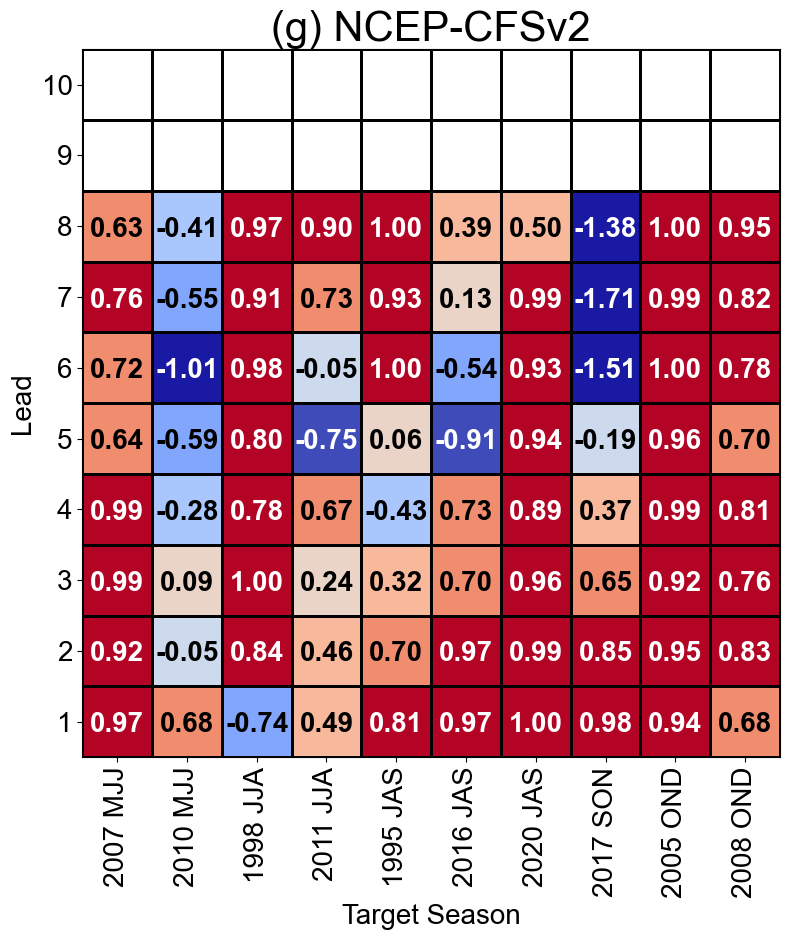

In [84]:

from matplotlib.colors import BoundaryNorm, to_rgba, ListedColormap
# Extract the x and y values
x = np.arange(len(ncep_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(ncep_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = ncep_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(g) NCEP-CFSv2', size=30)

# Adjust y-ticks to show original string labels
y_labels = ncep_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=ncep_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/ncep_Cold_Onset_SESS_LDV.svg', format='svg')

plt.show()


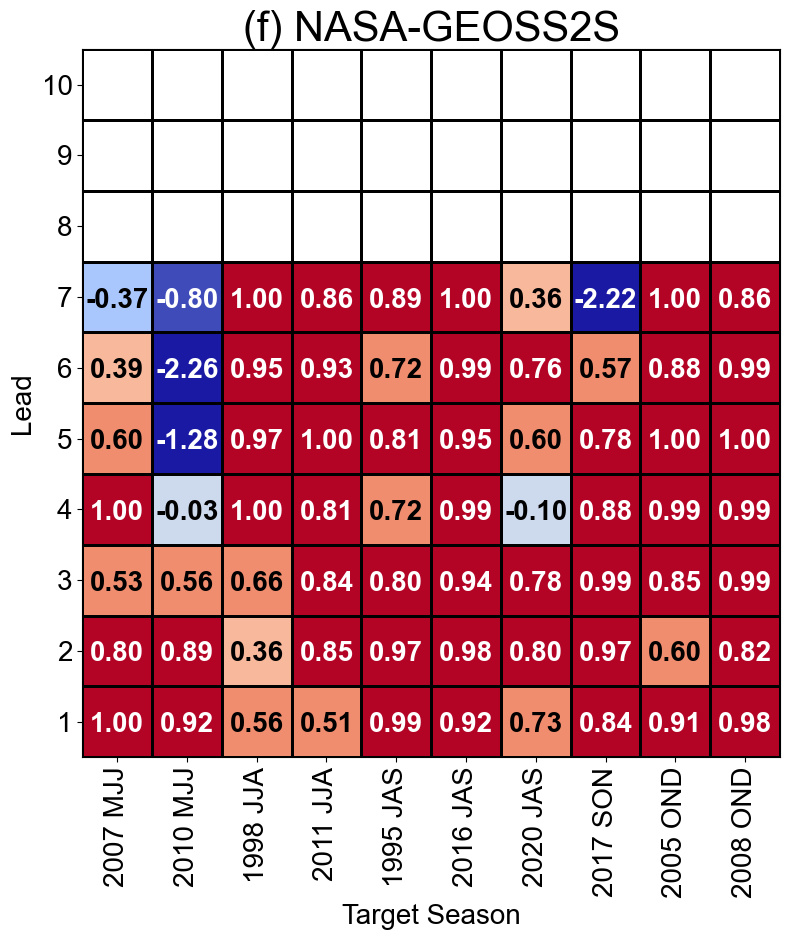

In [85]:
# nasa_cold 

# Extract the x and y values
x = np.arange(len(nasa_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(nasa_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = nasa_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(f) NASA-GEOSS2S', size=30)

# Adjust y-ticks to show original string labels
y_labels = nasa_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nasa_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/nasa_Cold_Onset_SESS_LDV.svg', format='svg')

plt.show()


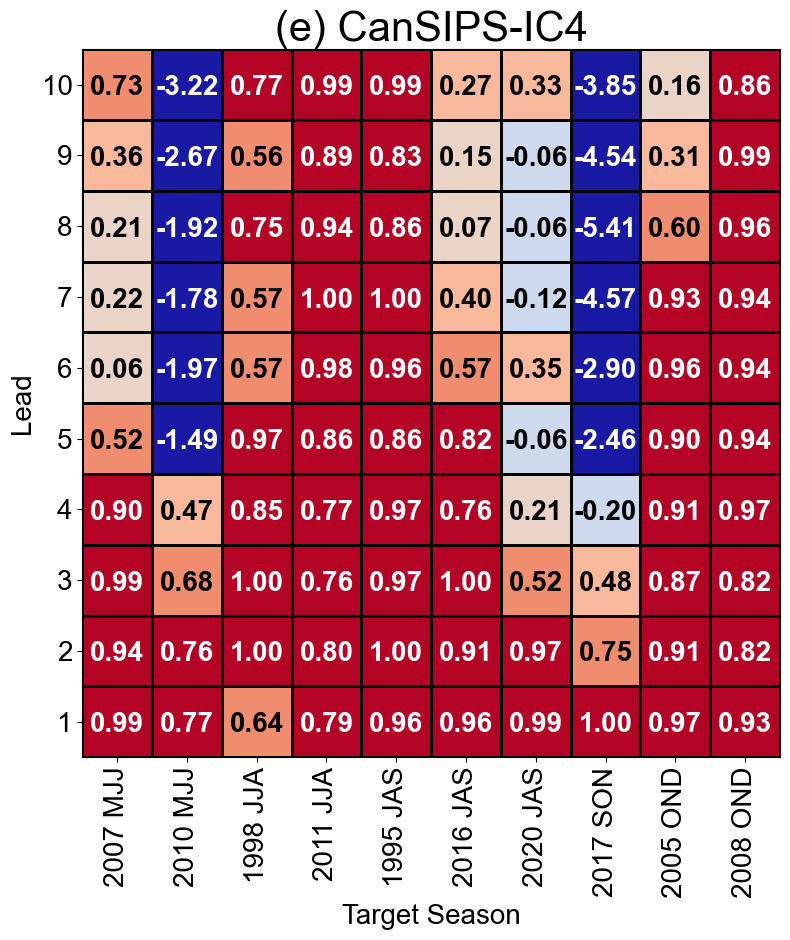

In [86]:
#canada_cold 

# Extract the x and y values
x = np.arange(len(canada_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canada_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = canada_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(e) CanSIPS-IC4', size=30)

# Adjust y-ticks to show original string labels
y_labels = canada_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canada_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/canada_Cold_Onset_SESS_LDV.svg', format='svg')

plt.show()


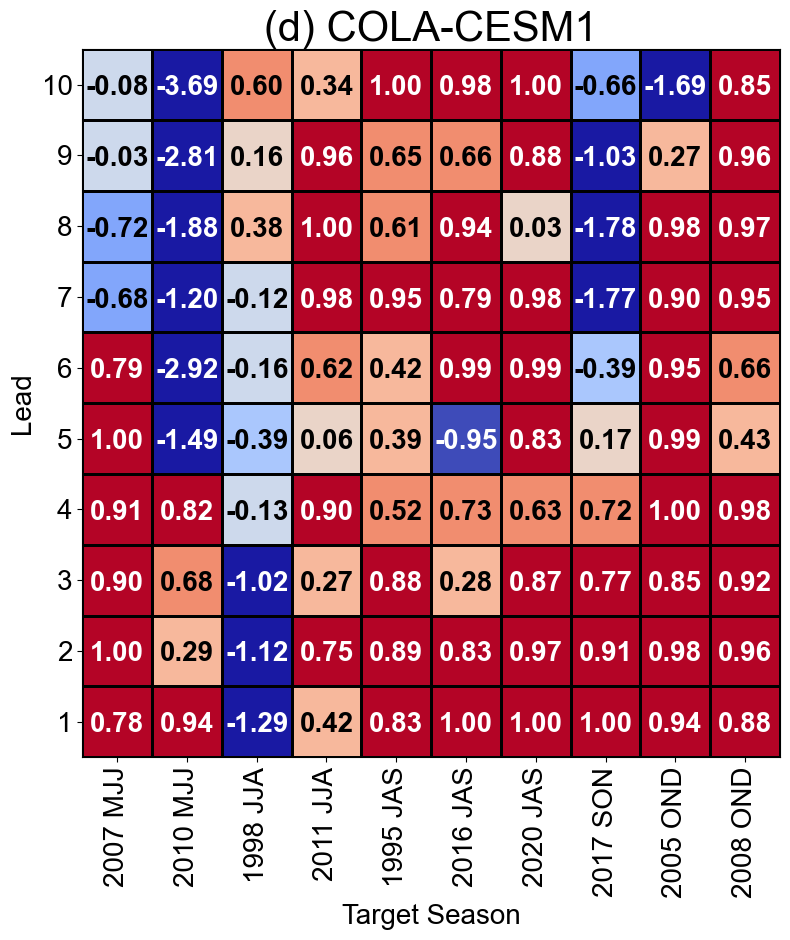

In [87]:
#cola_cold 

# Extract the x and y values
x = np.arange(len(cola_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(cola_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = cola_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(d) COLA-CESM1', size=30)

# Adjust y-ticks to show original string labels
y_labels = cola_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=cola_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/cola_Cold_Onset_SESS_LDV.svg', format='svg')

plt.show()


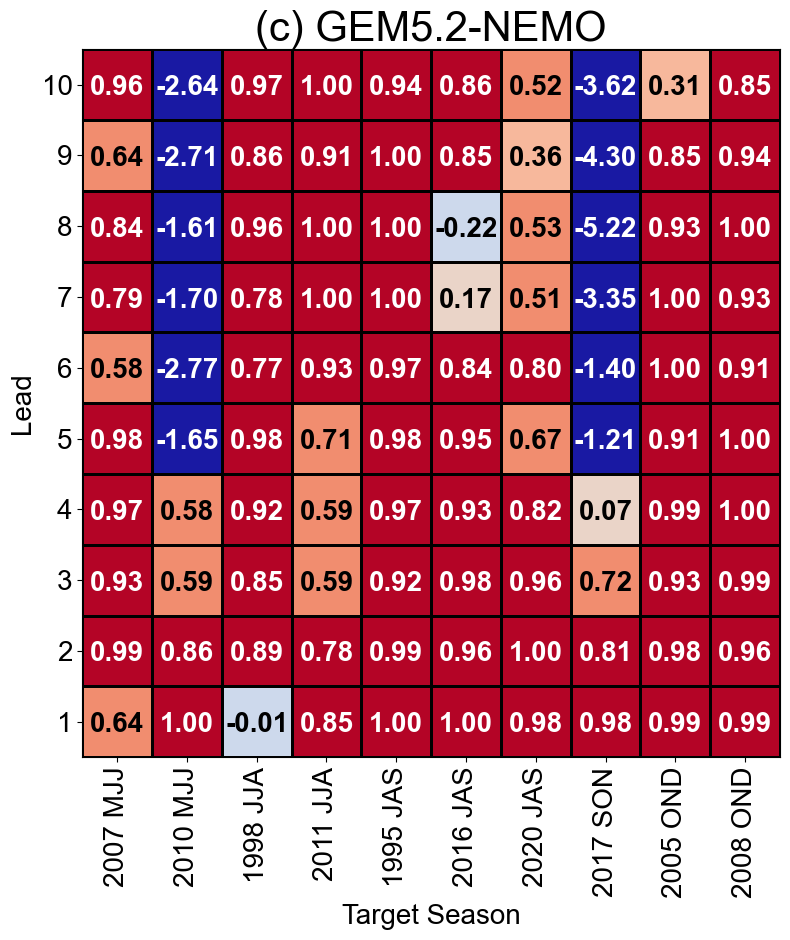

In [88]:
#nemo_cold 

# Extract the x and y values
x = np.arange(len(nemo_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(nemo_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = nemo_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(c) GEM5.2-NEMO', size=30)

# Adjust y-ticks to show original string labels
y_labels = nemo_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nemo_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/nemo_Cold_Onset_SESS_LDV.svg', format='svg')

plt.show()


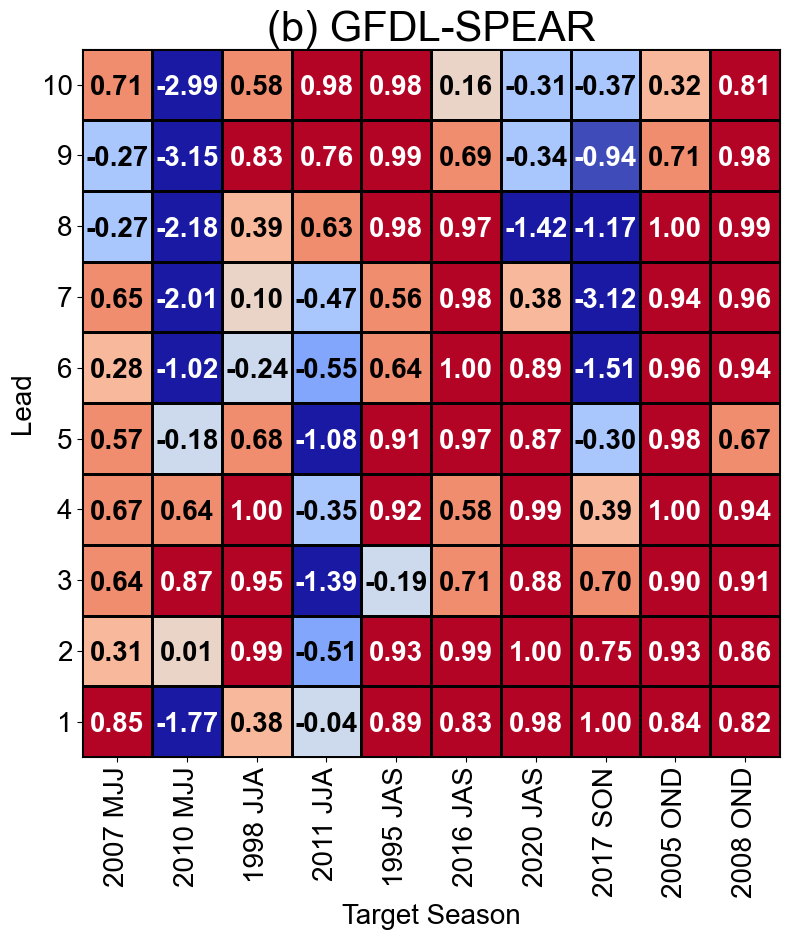

In [89]:
#gfdl_cold 

# Extract the x and y values
x = np.arange(len(gfdl_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(gfdl_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = gfdl_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(b) GFDL-SPEAR', size=30)

# Adjust y-ticks to show original string labels
y_labels = gfdl_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=gfdl_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/gfdl_Cold_Onset_SESS_LDV.svg', format='svg')

plt.show()


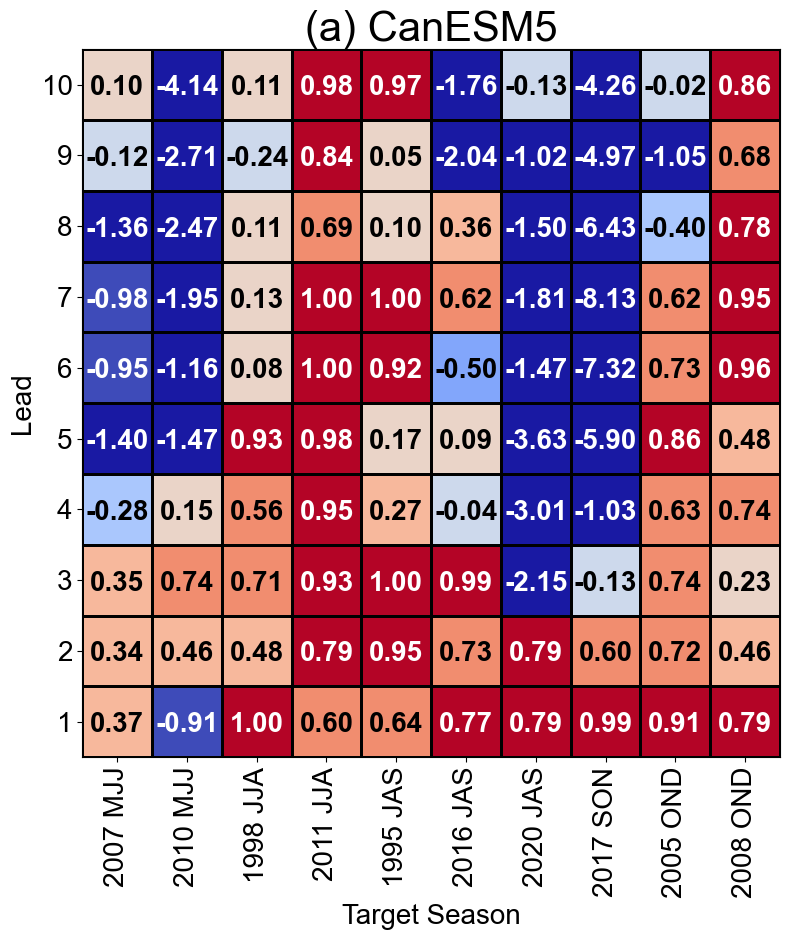

In [90]:
#canesm_cold 

# Extract the x and y values
x = np.arange(len(canesm_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canesm_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(a) CanESM5', size=30)

# Adjust y-ticks to show original string labels
y_labels = canesm_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/canesm_Cold_Onset_SESS_LDV.svg', format='svg')

plt.show()


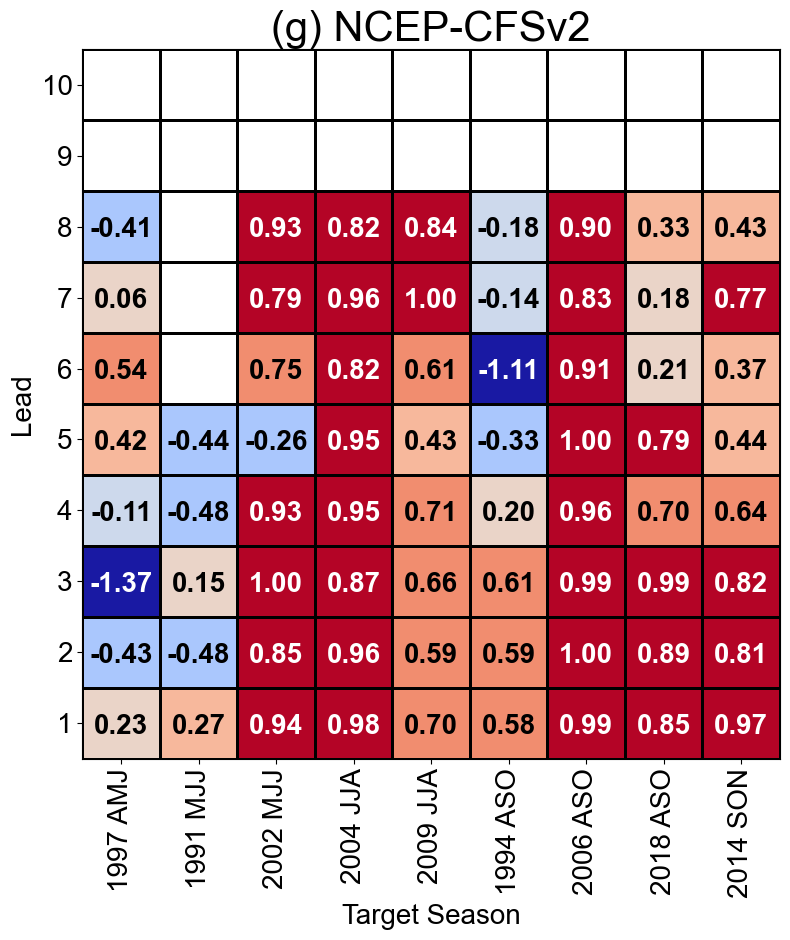

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(ncep_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(ncep_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = ncep_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(g) NCEP-CFSv2', size=30)

# Adjust y-ticks to show original string labels
y_labels = ncep_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=ncep_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/ncep_Warm_Onset_SESS_LDV.svg', format='svg')

plt.show()


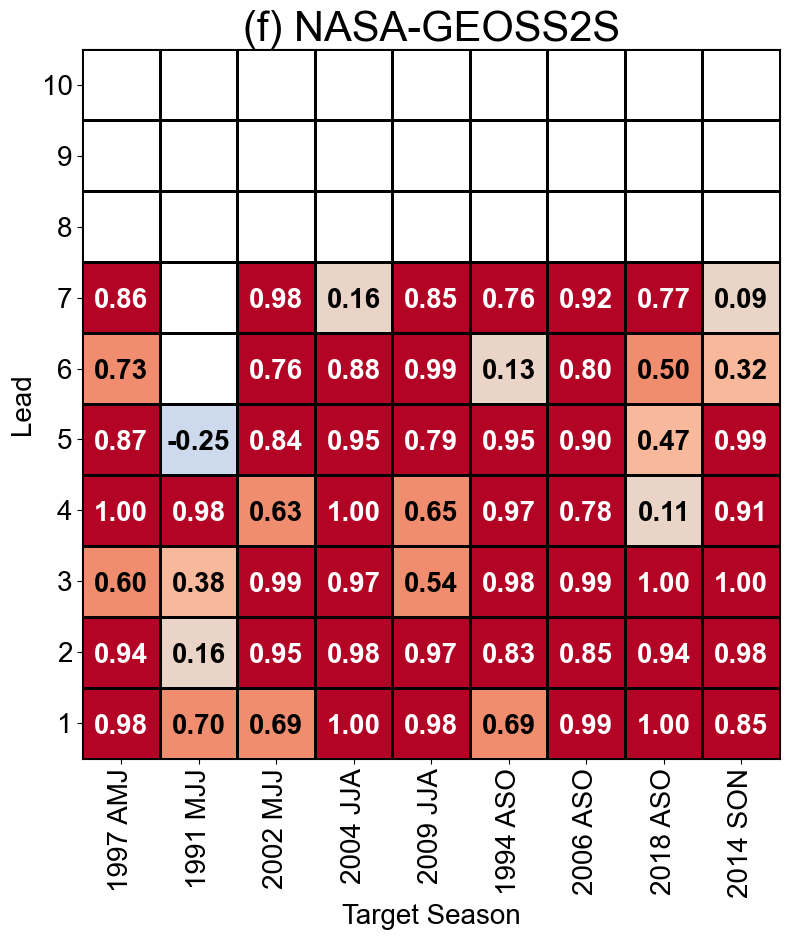

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(nasa_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(nasa_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = nasa_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(f) NASA-GEOSS2S', size=30)

# Adjust y-ticks to show original string labels
y_labels = nasa_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nasa_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/nasa_Warm_Onset_SESS_LDV.svg', format='svg')

plt.show()


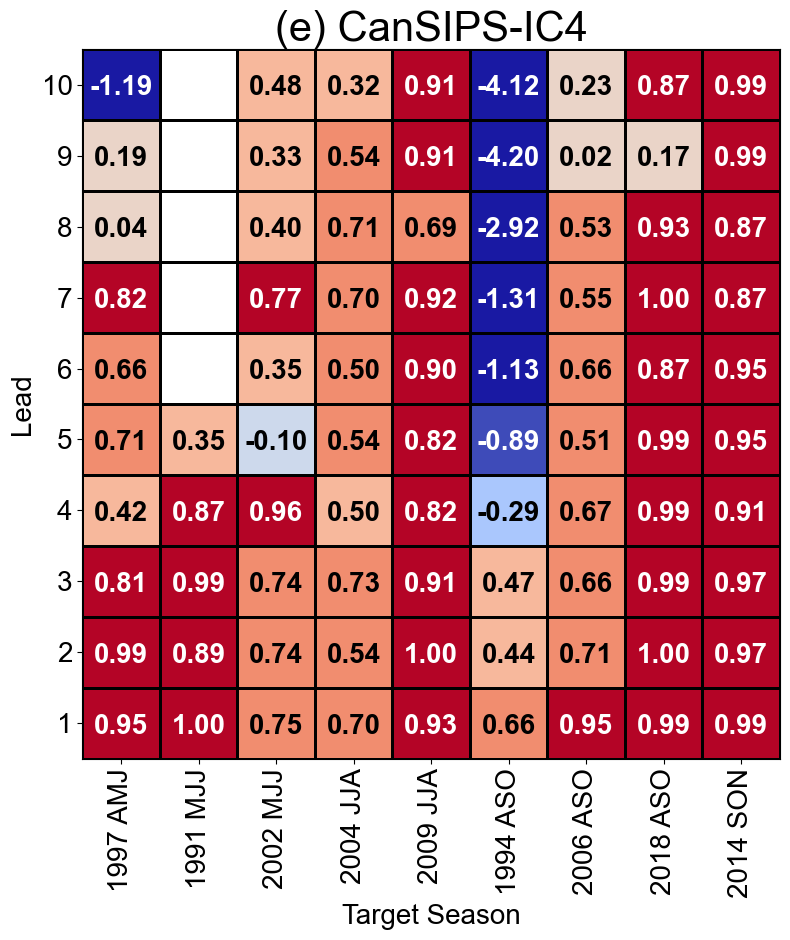

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(canada_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canada_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canada_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(e) CanSIPS-IC4', size=30)

# Adjust y-ticks to show original string labels
y_labels = canada_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canada_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/canada_Warm_Onset_SESS_LDV.svg', format='svg')

plt.show()


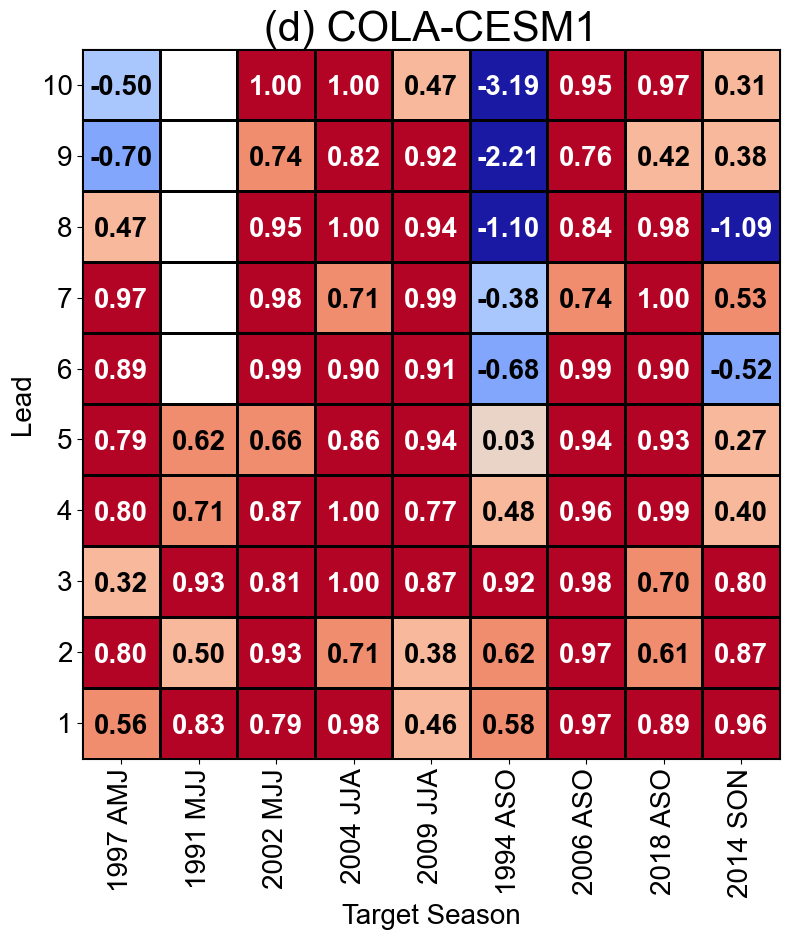

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(cola_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(cola_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = cola_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(d) COLA-CESM1', size=30)

# Adjust y-ticks to show original string labels
y_labels = cola_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=cola_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/cola_Warm_Onset_SESS_LDV.svg', format='svg')

plt.show()


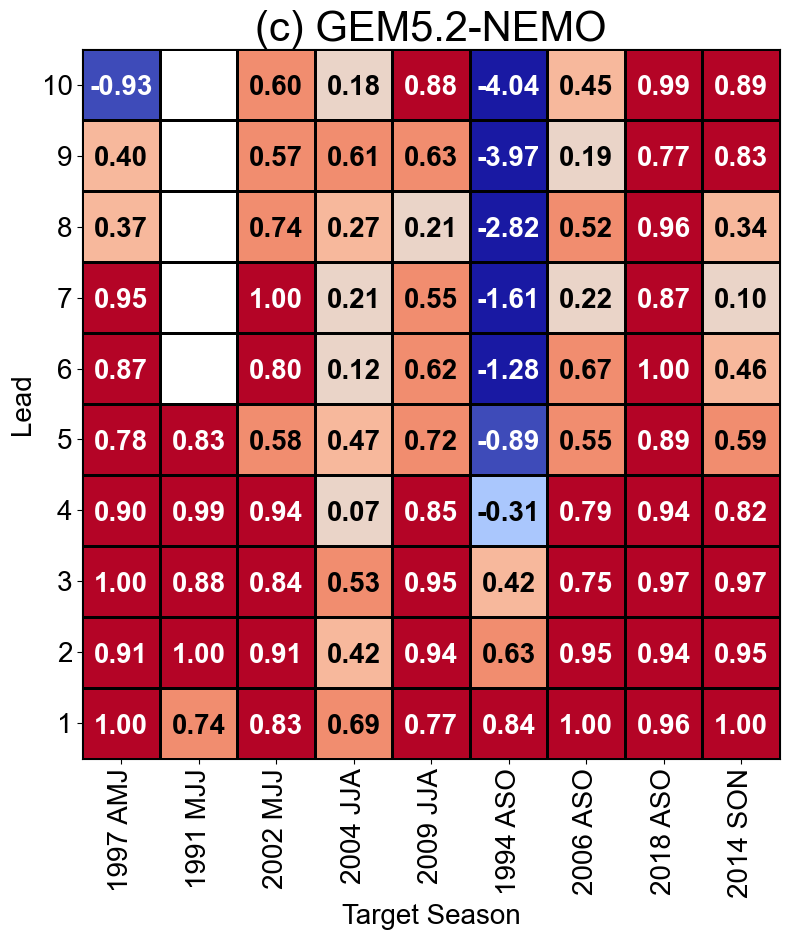

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(nemo_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(nemo_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = nemo_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(c) GEM5.2-NEMO', size=30)

# Adjust y-ticks to show original string labels
y_labels = nemo_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nemo_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/nemo_Warm_Onset_SESS_LDV.svg', format='svg')

plt.show()


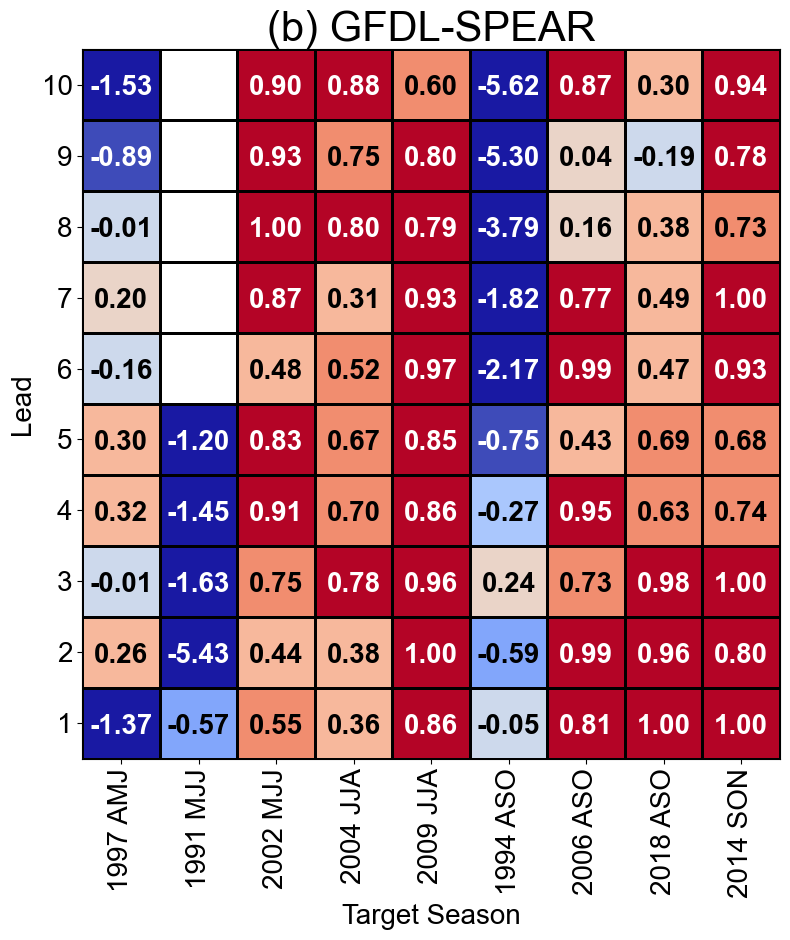

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(gfdl_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(gfdl_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = gfdl_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(b) GFDL-SPEAR', size=30)

# Adjust y-ticks to show original string labels
y_labels = gfdl_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=gfdl_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/gfdl_Warm_Onset_SESS_LDV.svg', format='svg')

plt.show()


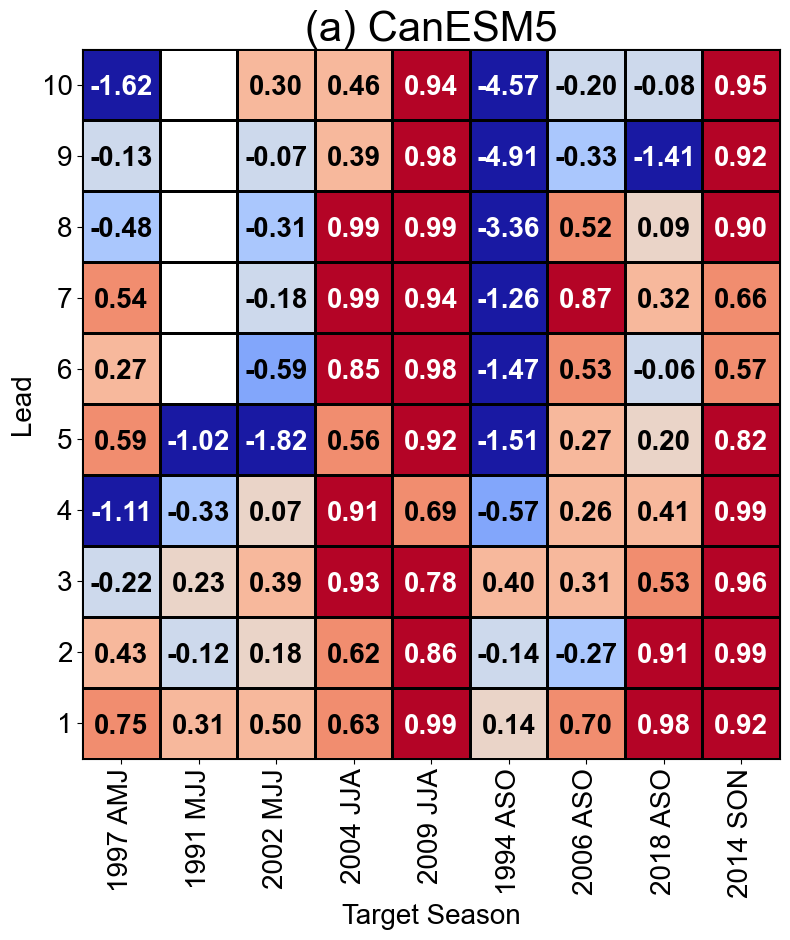

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(canesm_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canesm_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(a) CanESM5', size=30)

# Adjust y-ticks to show original string labels
y_labels = canesm_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/canesm_Warm_Onset_SESS_LDV.svg', format='svg')

plt.show()


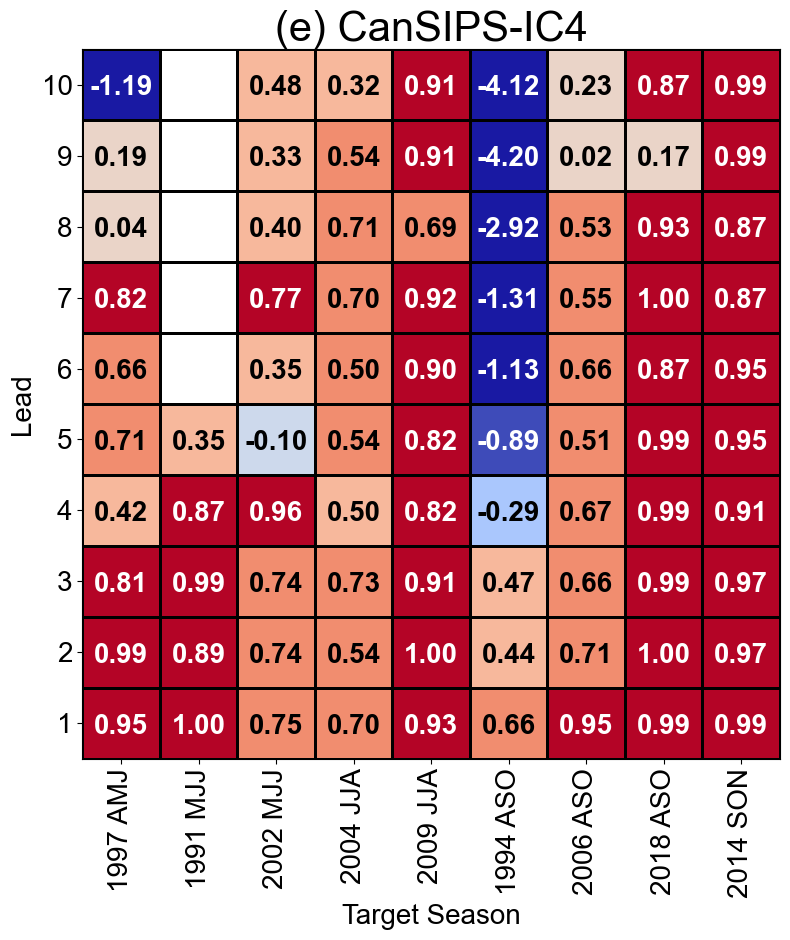

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(canada_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canada_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canada_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(e) CanSIPS-IC4', size=30)

# Adjust y-ticks to show original string labels
y_labels = canada_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canada_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/canada_Warm_Onset_SESS_LDV.svg', format='svg')

plt.show()


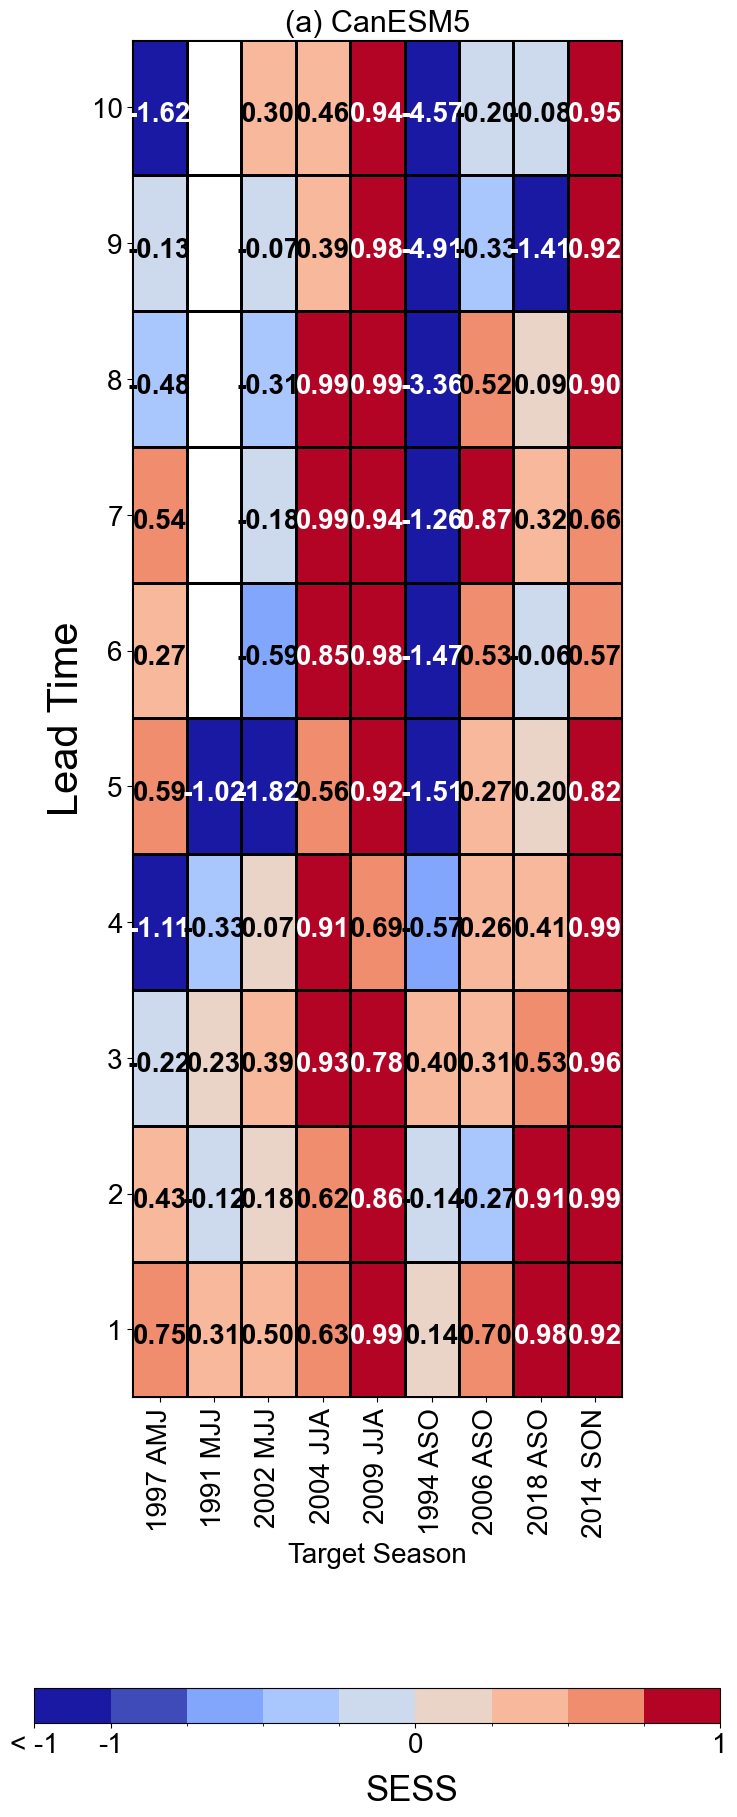

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(canesm_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canesm_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # Placeholder, replace with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,20))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar with customization options
cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal', aspect=20, shrink=1.4)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('SESS', fontsize=25)
cbar.set_ticks([-1.25, -1, 0, 1])  # Define the positions of the ticks
cbar.set_ticklabels(['< -1', '-1', '0', '1'])  # Set custom labels
cbar.ax.xaxis.set_label_coords(0.55, -1.5)

# Customize colorbar tick parameters
#cbar.ax.tick_params(labelsize=15, length=10, width=2)  # Change the font size, tick length, and tick width here

# Add labels and title
plt.ylabel('Lead Time', size=30)
plt.xlabel('Target Season', size=20)
plt.title('(a) CanESM5', size=22)

# Adjust y-ticks to show original string labels
y_labels = canesm_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299 * r + 0.587 * g + 0.114 * b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWLDV/ERRORBAR.svg', format='svg')

plt.show()


In [100]:
"""import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(ncep_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(ncep_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = ncep_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(6.5,7))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead Time', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(g) NCEP-CFSv2', size=22)

# Adjust y-ticks to show original string labels
y_labels = ncep_warm_mesh.index.tolist()
adjusted_y_labels = [str(float(label)-1) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=15)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=ncep_warm_mesh.columns, rotation=90, size=15)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=15, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/LDV/ncep_Warm_Onset_SESS_LDV.svg', format='svg')

plt.show()
"""


"import numpy as np\nimport matplotlib.pyplot as plt\nfrom matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap\n\n# Extract the x and y values\nx = np.arange(len(ncep_warm_mesh.columns))  # Numerical indices for Lead times (L)\ny = np.arange(len(ncep_warm_mesh.index))    # Numerical indices for Target times (TAR)\nZ = ncep_warm_mesh.values\n\n# Create a custom colormap\ncmap = plt.get_cmap('coolwarm')\nnew_colors = cmap(np.linspace(0, 1, 10))\ndark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue\nregular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color\n\n# Replace the first two colors\nnew_colors[0] = dark_blue  # Dark blue for the first color\nnew_colors[1] = regular_blue  # Regular blue for the second color\ncustom_cmap = ListedColormap(new_colors)\n\nboundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25\nnorm = BoundaryNorm(boundaries, ncolors=c